In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style="darkgrid")
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns.shape

(21,)

In [4]:
df.drop('customerID', axis = 1, inplace = True)

#### Data Understanding

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### Checking null and duplicate values

In [8]:
# checking for missing values 
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# checking for duplicate values
df.duplicated().sum()

22

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.groupby('gender')['MonthlyCharges'].median()

gender
Female    70.70
Male      70.15
Name: MonthlyCharges, dtype: float64

#### Exploring Target Variable

In [12]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
# checking for imbalance in target column
class_counts = df['Churn'].value_counts()
print("Class counts:\n", class_counts)

# To get percentages
class_percentages = df['Churn'].value_counts(normalize=True) * 100
print("\nClass percentages:\n", class_percentages)

Class counts:
 Churn
No     5164
Yes    1857
Name: count, dtype: int64

Class percentages:
 Churn
No     73.550776
Yes    26.449224
Name: proportion, dtype: float64


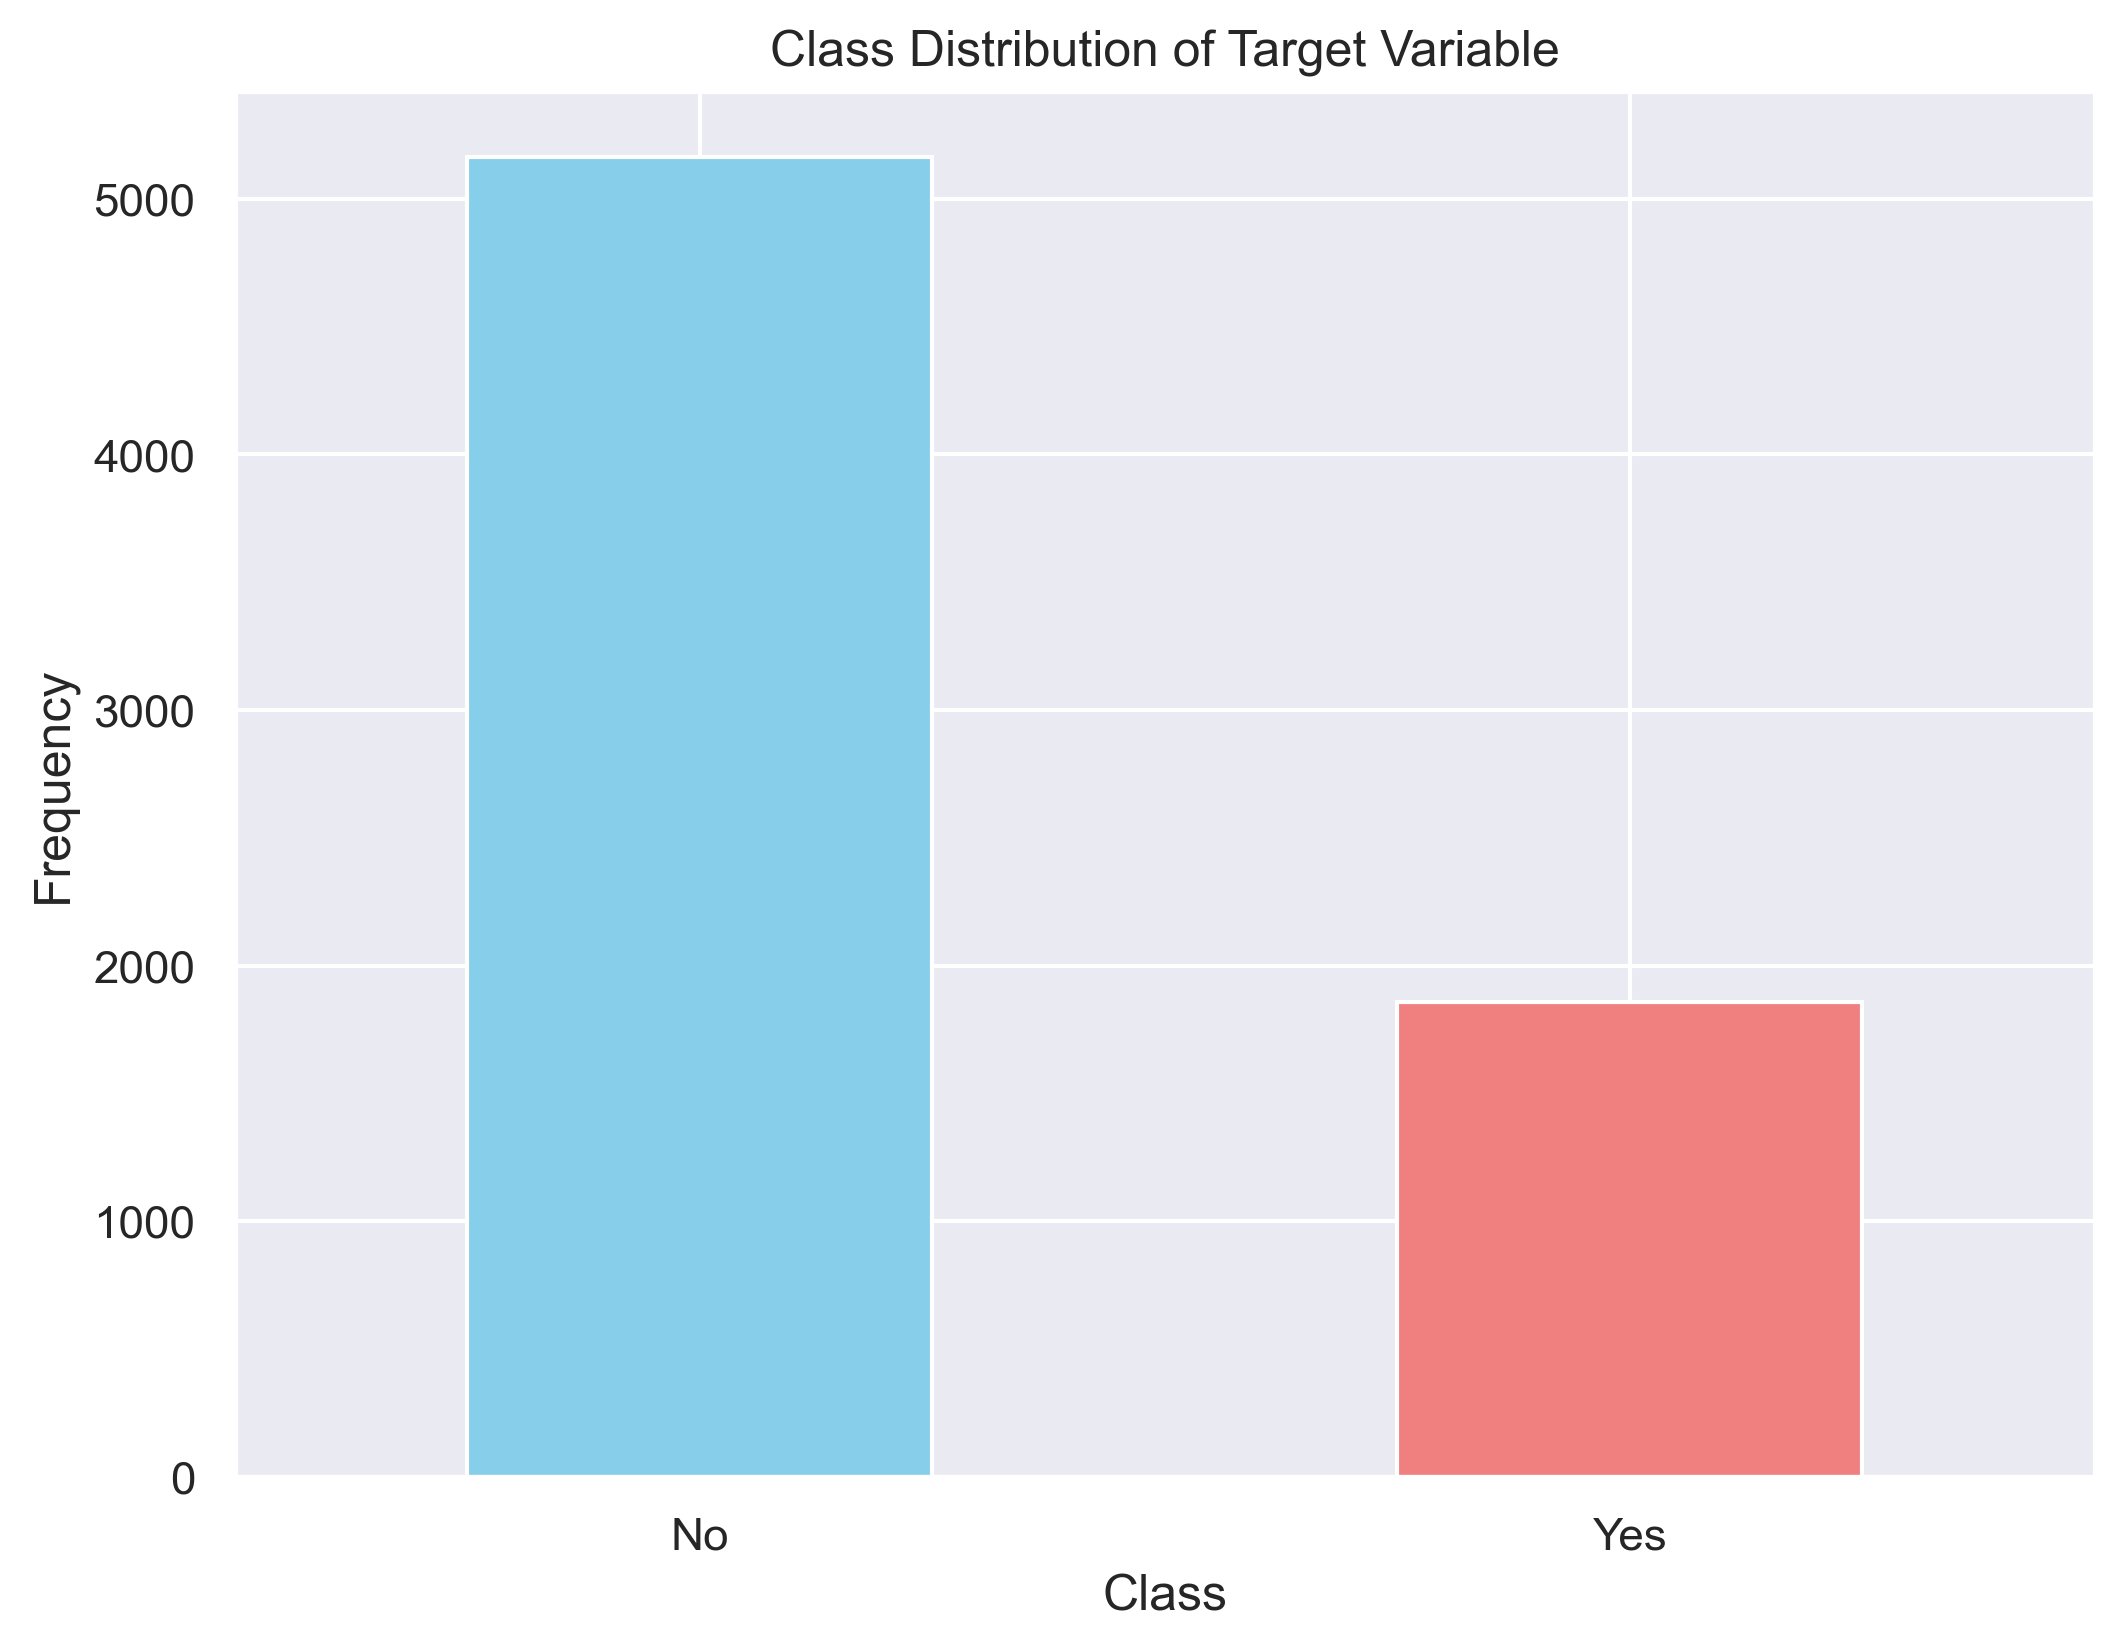

In [14]:
# using barplot
plt.figure(figsize=(8, 6))
df['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Class Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

#### Exploring numerical and Categorical Features

In [15]:
# numerical features
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894
std,0.368947,24.534965,30.069001
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.750000
50%,0.000000,29.000000,70.400000
75%,0.000000,55.000000,89.900000
max,1.000000,72.000000,118.750000


In [16]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce').fillna(0)

In [17]:
num_cols = df.select_dtypes(include = ['float64', 'int']).columns

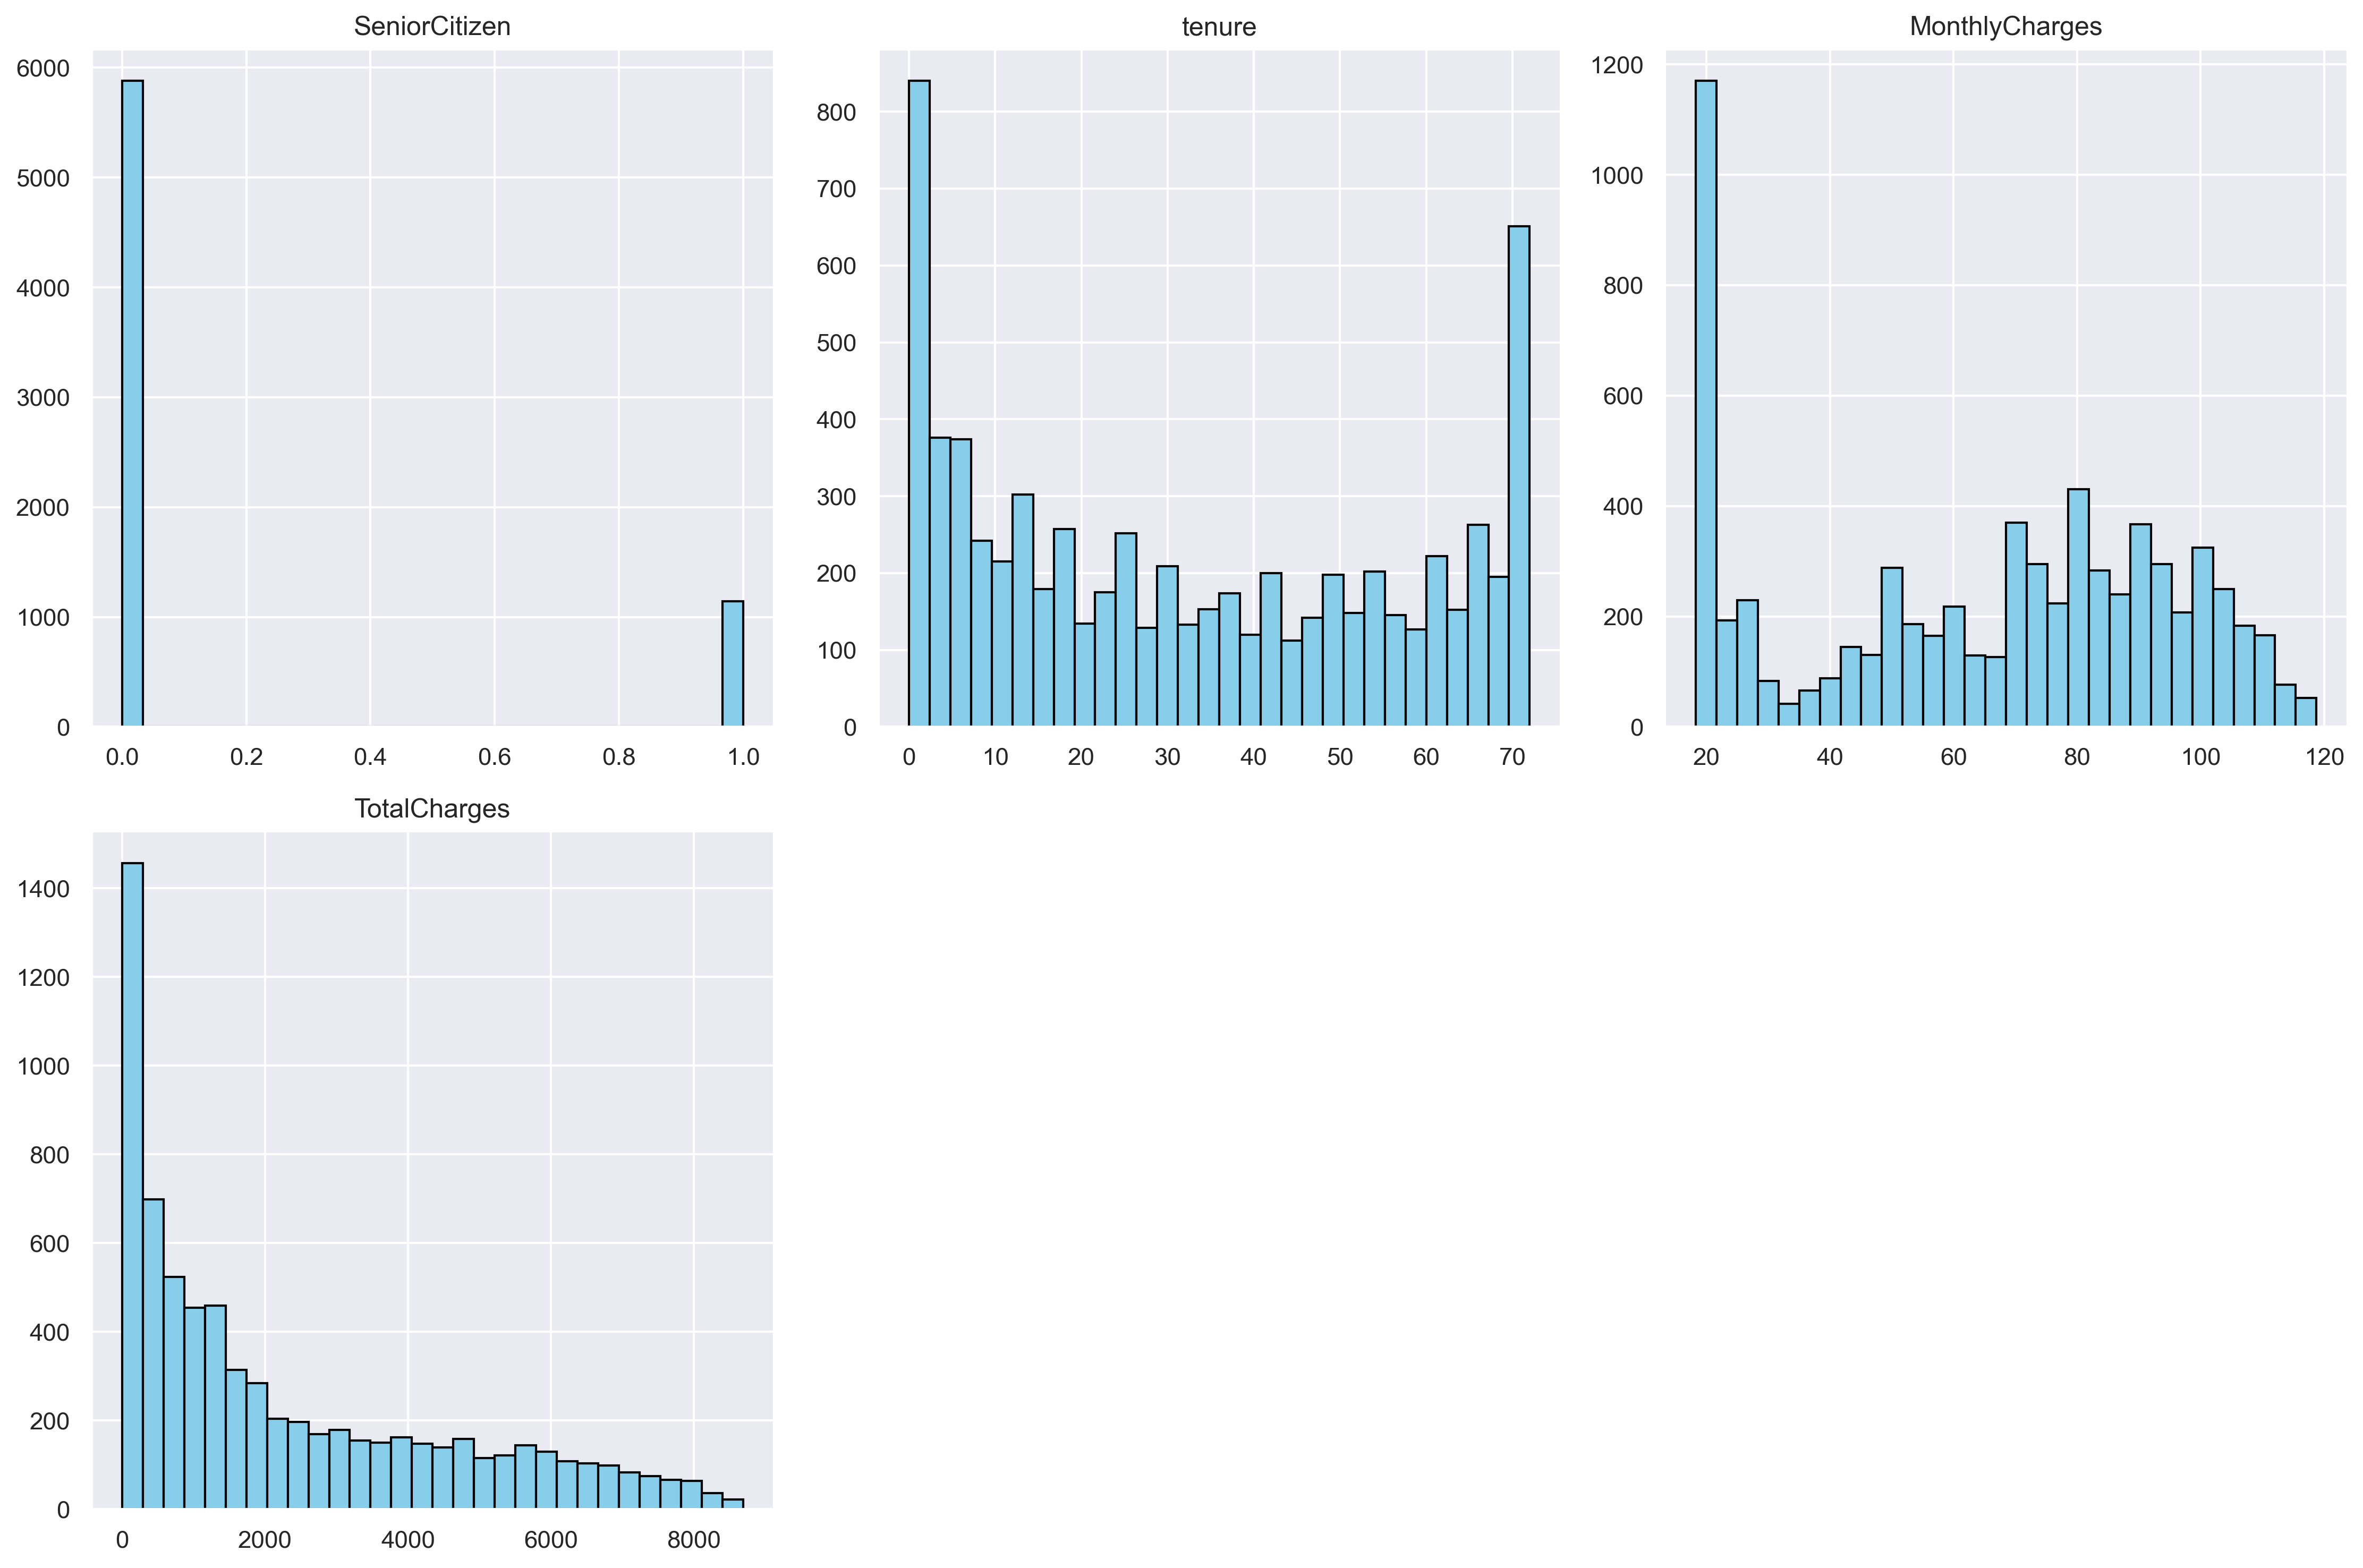

In [18]:
# visualization
# histograms for numeric columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//3 + 1, 3, i)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(col)
plt.tight_layout()
plt.show()

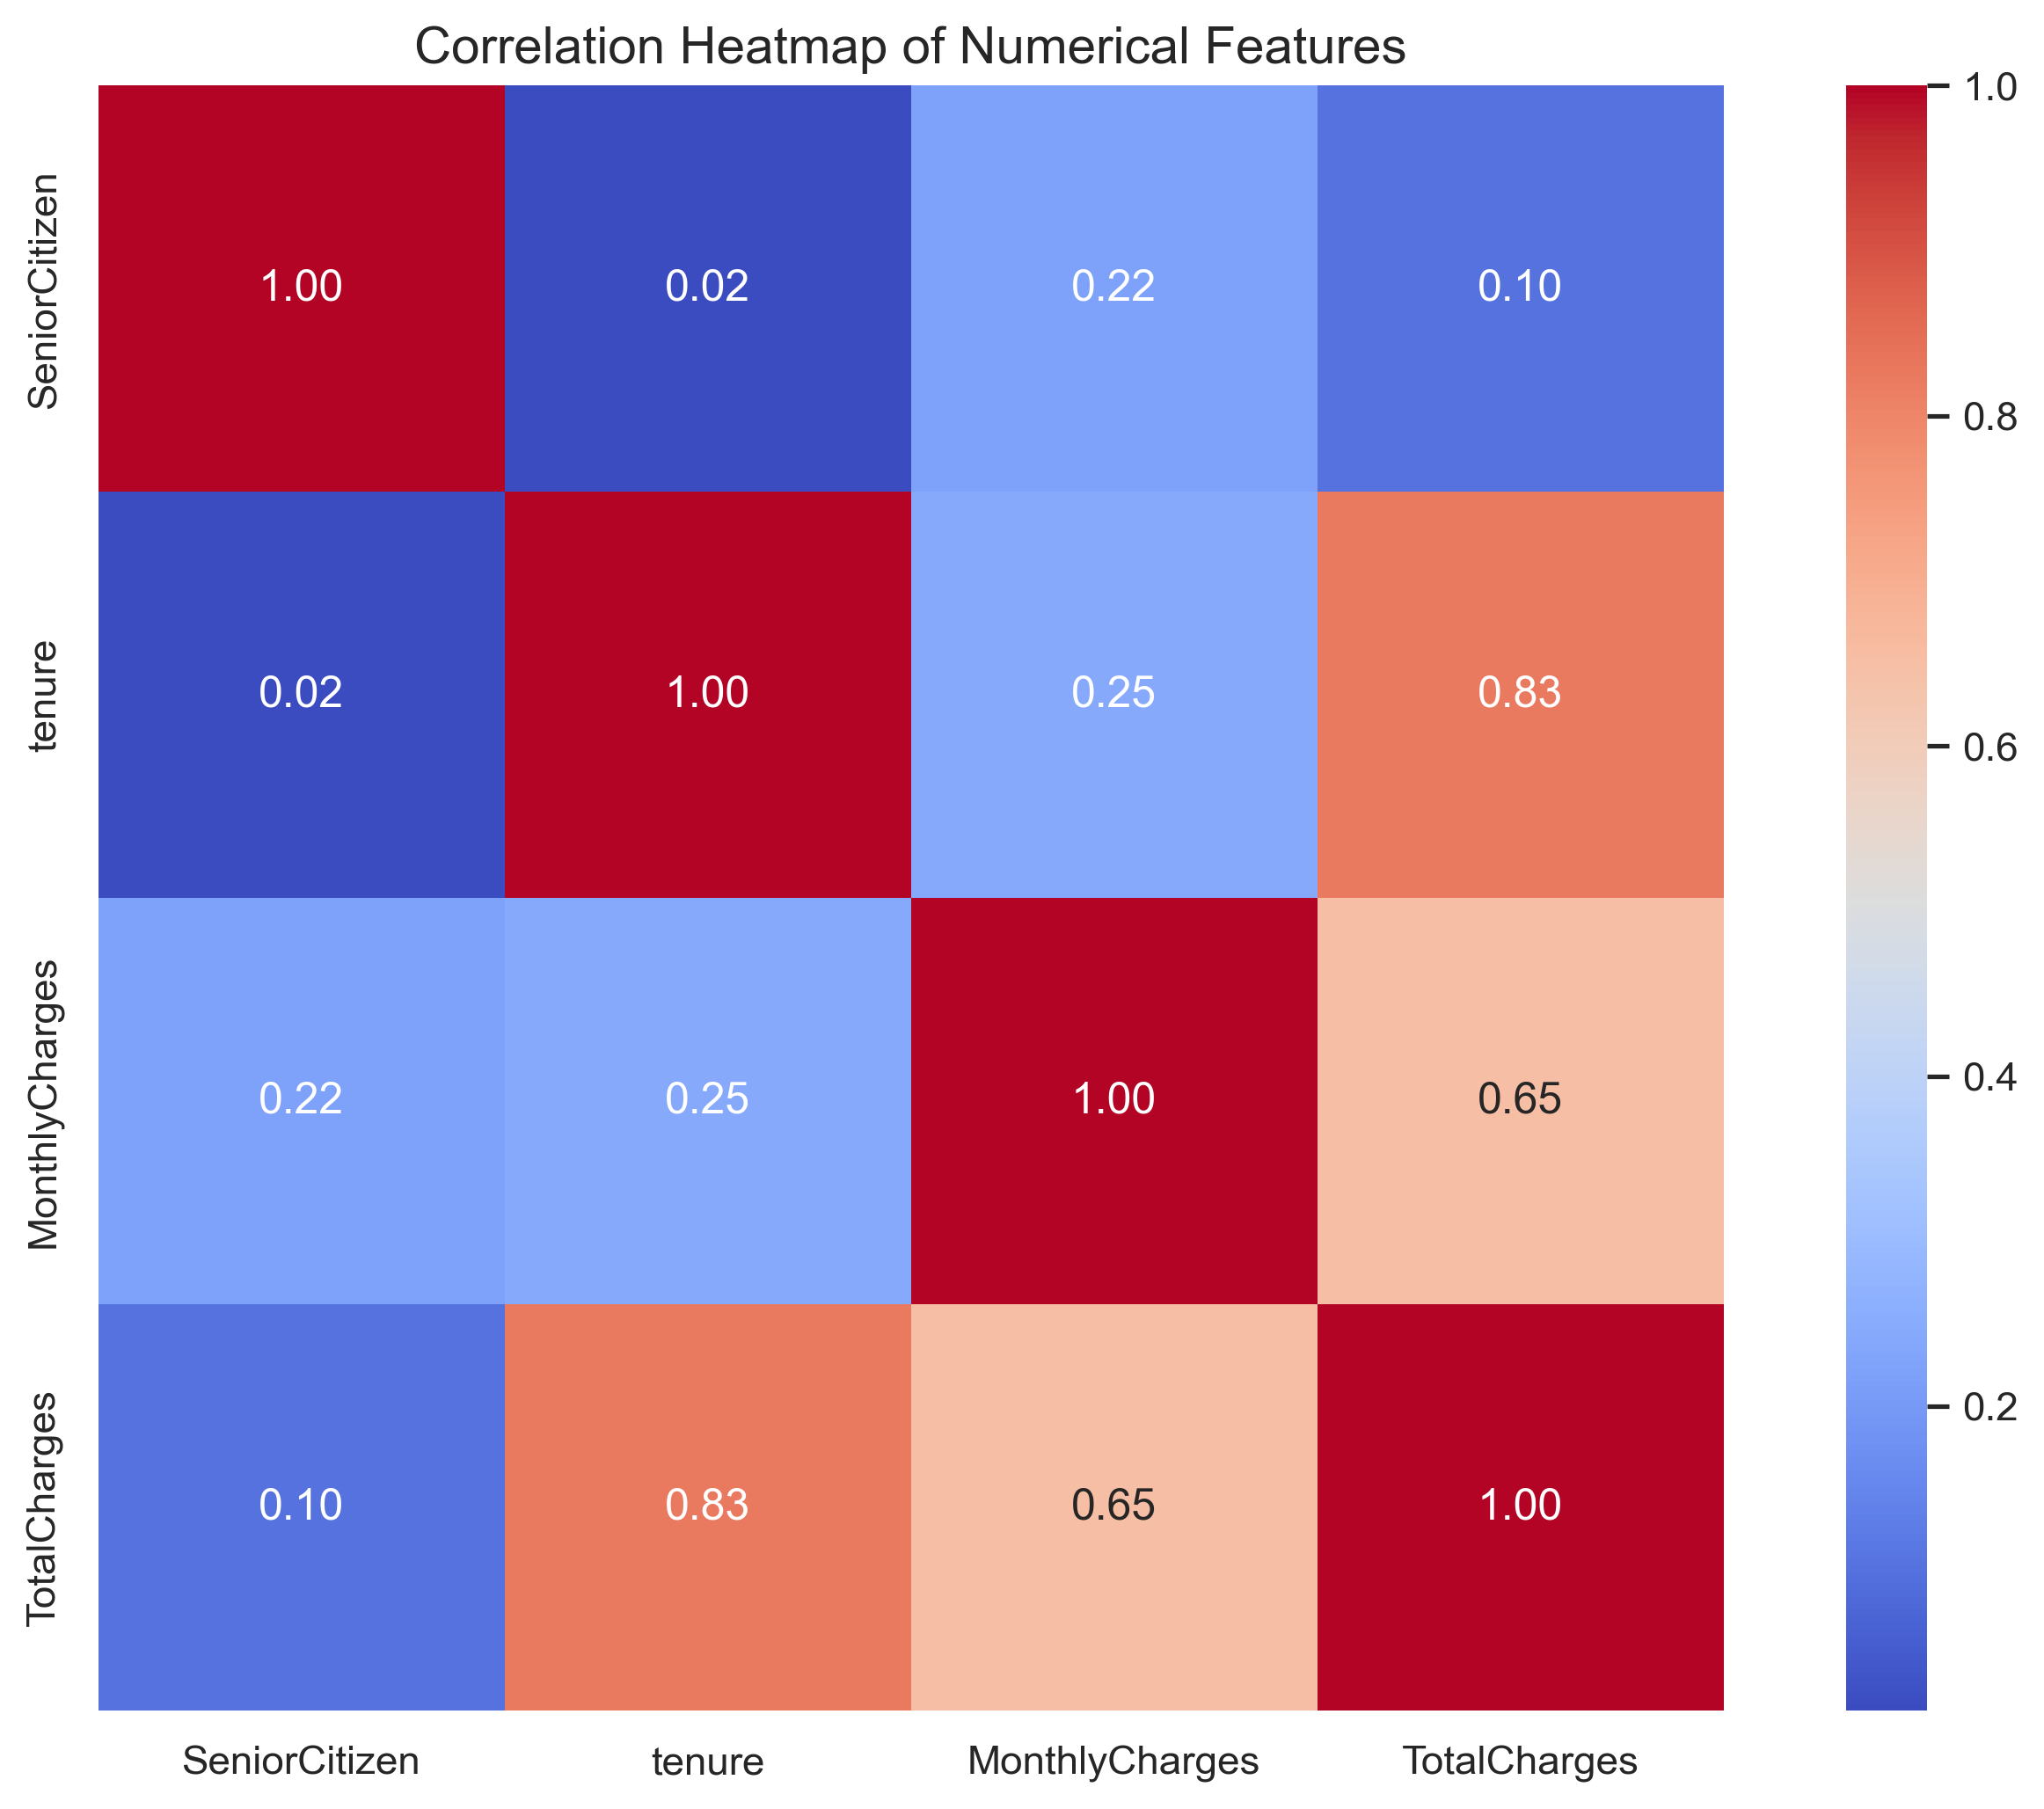

In [19]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()

<Axes: >

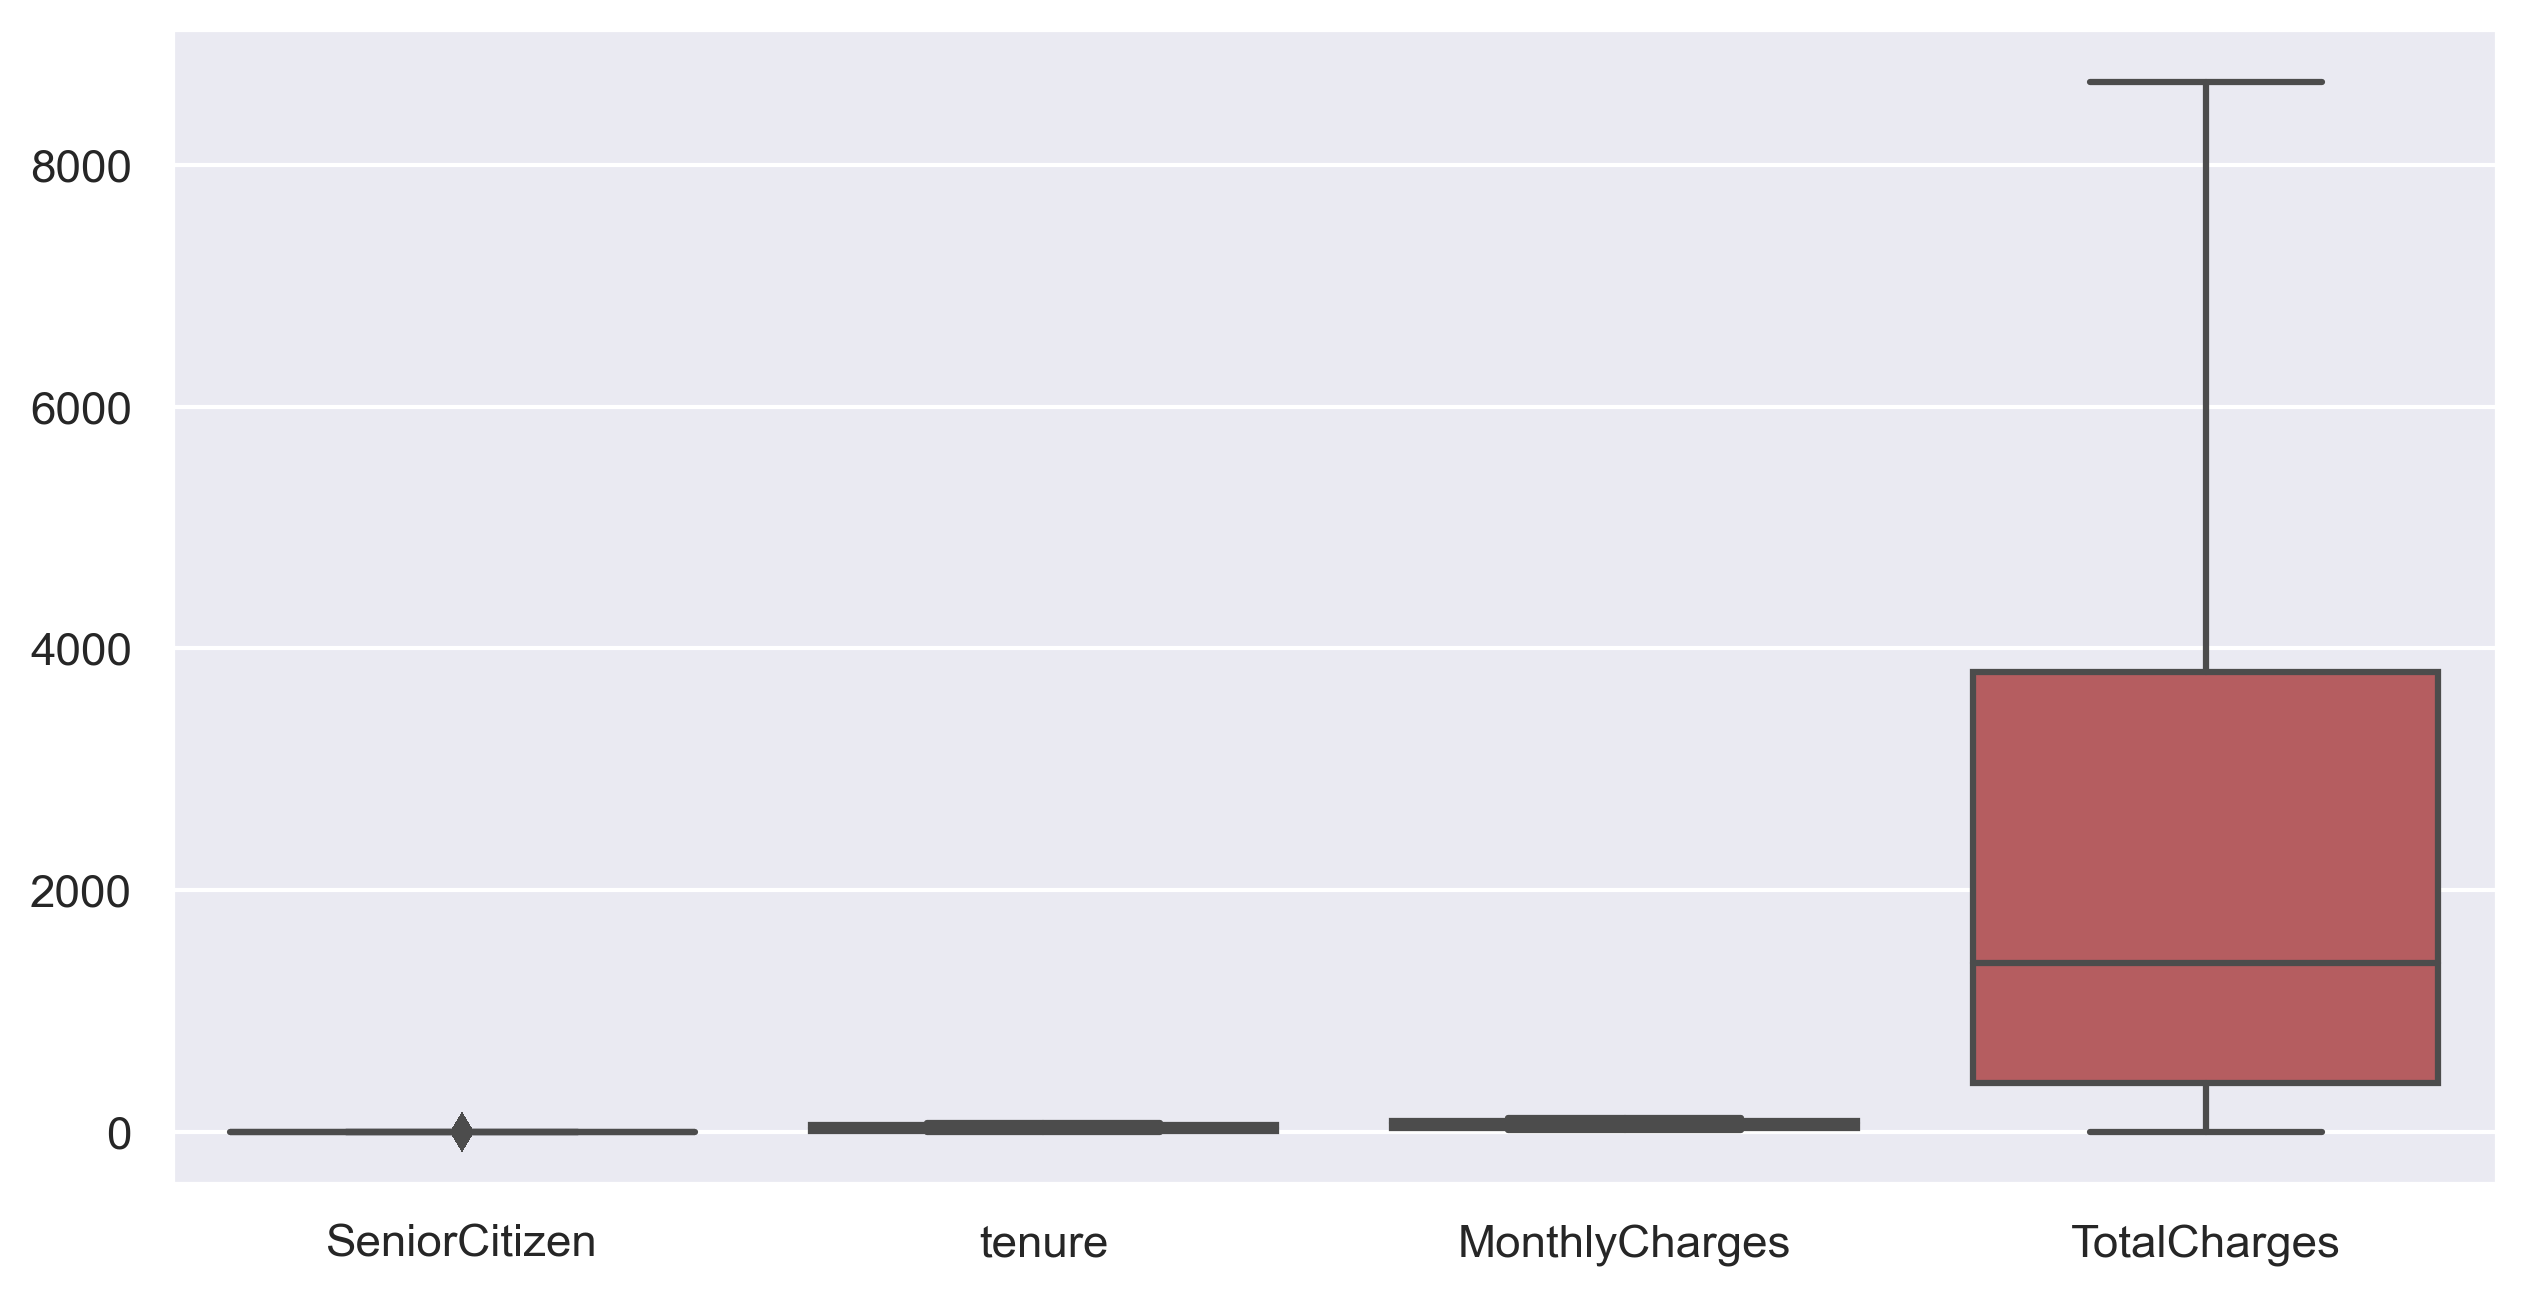

In [20]:
# boxplot to check outliers 
sns.boxplot(data = df)

In [21]:
# categorical Columns
cat_cols = df.select_dtypes(include = ['object','category']).columns

#### Feature Engineering

In [22]:
binary_cols = []
for col in cat_cols:
    if df[col].nunique() == 2:
        binary_cols.append(col)

In [23]:
print("Numeric Columns : ", num_cols)
print("\nCategorical Columns : ", cat_cols)
print("\nBinary Columns : ", binary_cols)

Numeric Columns :  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

Categorical Columns :  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

Binary Columns :  ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']


In [24]:
# now performing encoding using label and one hot encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label encode binary features
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [25]:
# One-Hot Encode multi-class categorical features
for col in cat_cols:
    ohe = OneHotEncoder(drop='first', sparse_output=False)
    transformed = ohe.fit_transform(df[[col]]).astype(int)
    new_cols = [f"{col}_{cat}" for cat in ohe.categories_[0][1:]]
    df_ohe = pd.DataFrame(transformed, columns=new_cols, index=df.index)
    df = pd.concat([df.drop(col, axis=1), df_ohe], axis=1)

In [26]:
df.rename(columns = {'Churn_1':'Churn'}, inplace = True)

In [27]:
# performing feature selection
from sklearn.ensemble import RandomForestClassifier

X = df.drop('Churn', axis=1)
y = df['Churn']

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False)

TotalCharges                             0.194785
MonthlyCharges                           0.176182
tenure                                   0.171255
InternetService_Fiber optic              0.036003
PaymentMethod_Electronic check           0.034864
Contract_Two year                        0.030000
OnlineSecurity_Yes                       0.028658
gender_1                                 0.028653
PaperlessBilling_1                       0.025679
TechSupport_Yes                          0.023501
Partner_1                                0.023462
OnlineBackup_Yes                         0.021686
Contract_One year                        0.021675
SeniorCitizen                            0.020427
MultipleLines_Yes                        0.020191
Dependents_1                             0.019464
DeviceProtection_Yes                     0.019189
StreamingMovies_Yes                      0.017749
StreamingTV_Yes                          0.016889
PaymentMethod_Credit card (automatic)    0.013468


In [29]:
# we will select top features which are greater than 0.01
important_features = importances[importances > 0.01].index
X_selected = X[important_features]

print(f"Selected {X_selected.shape[1]} features")

Selected 21 features


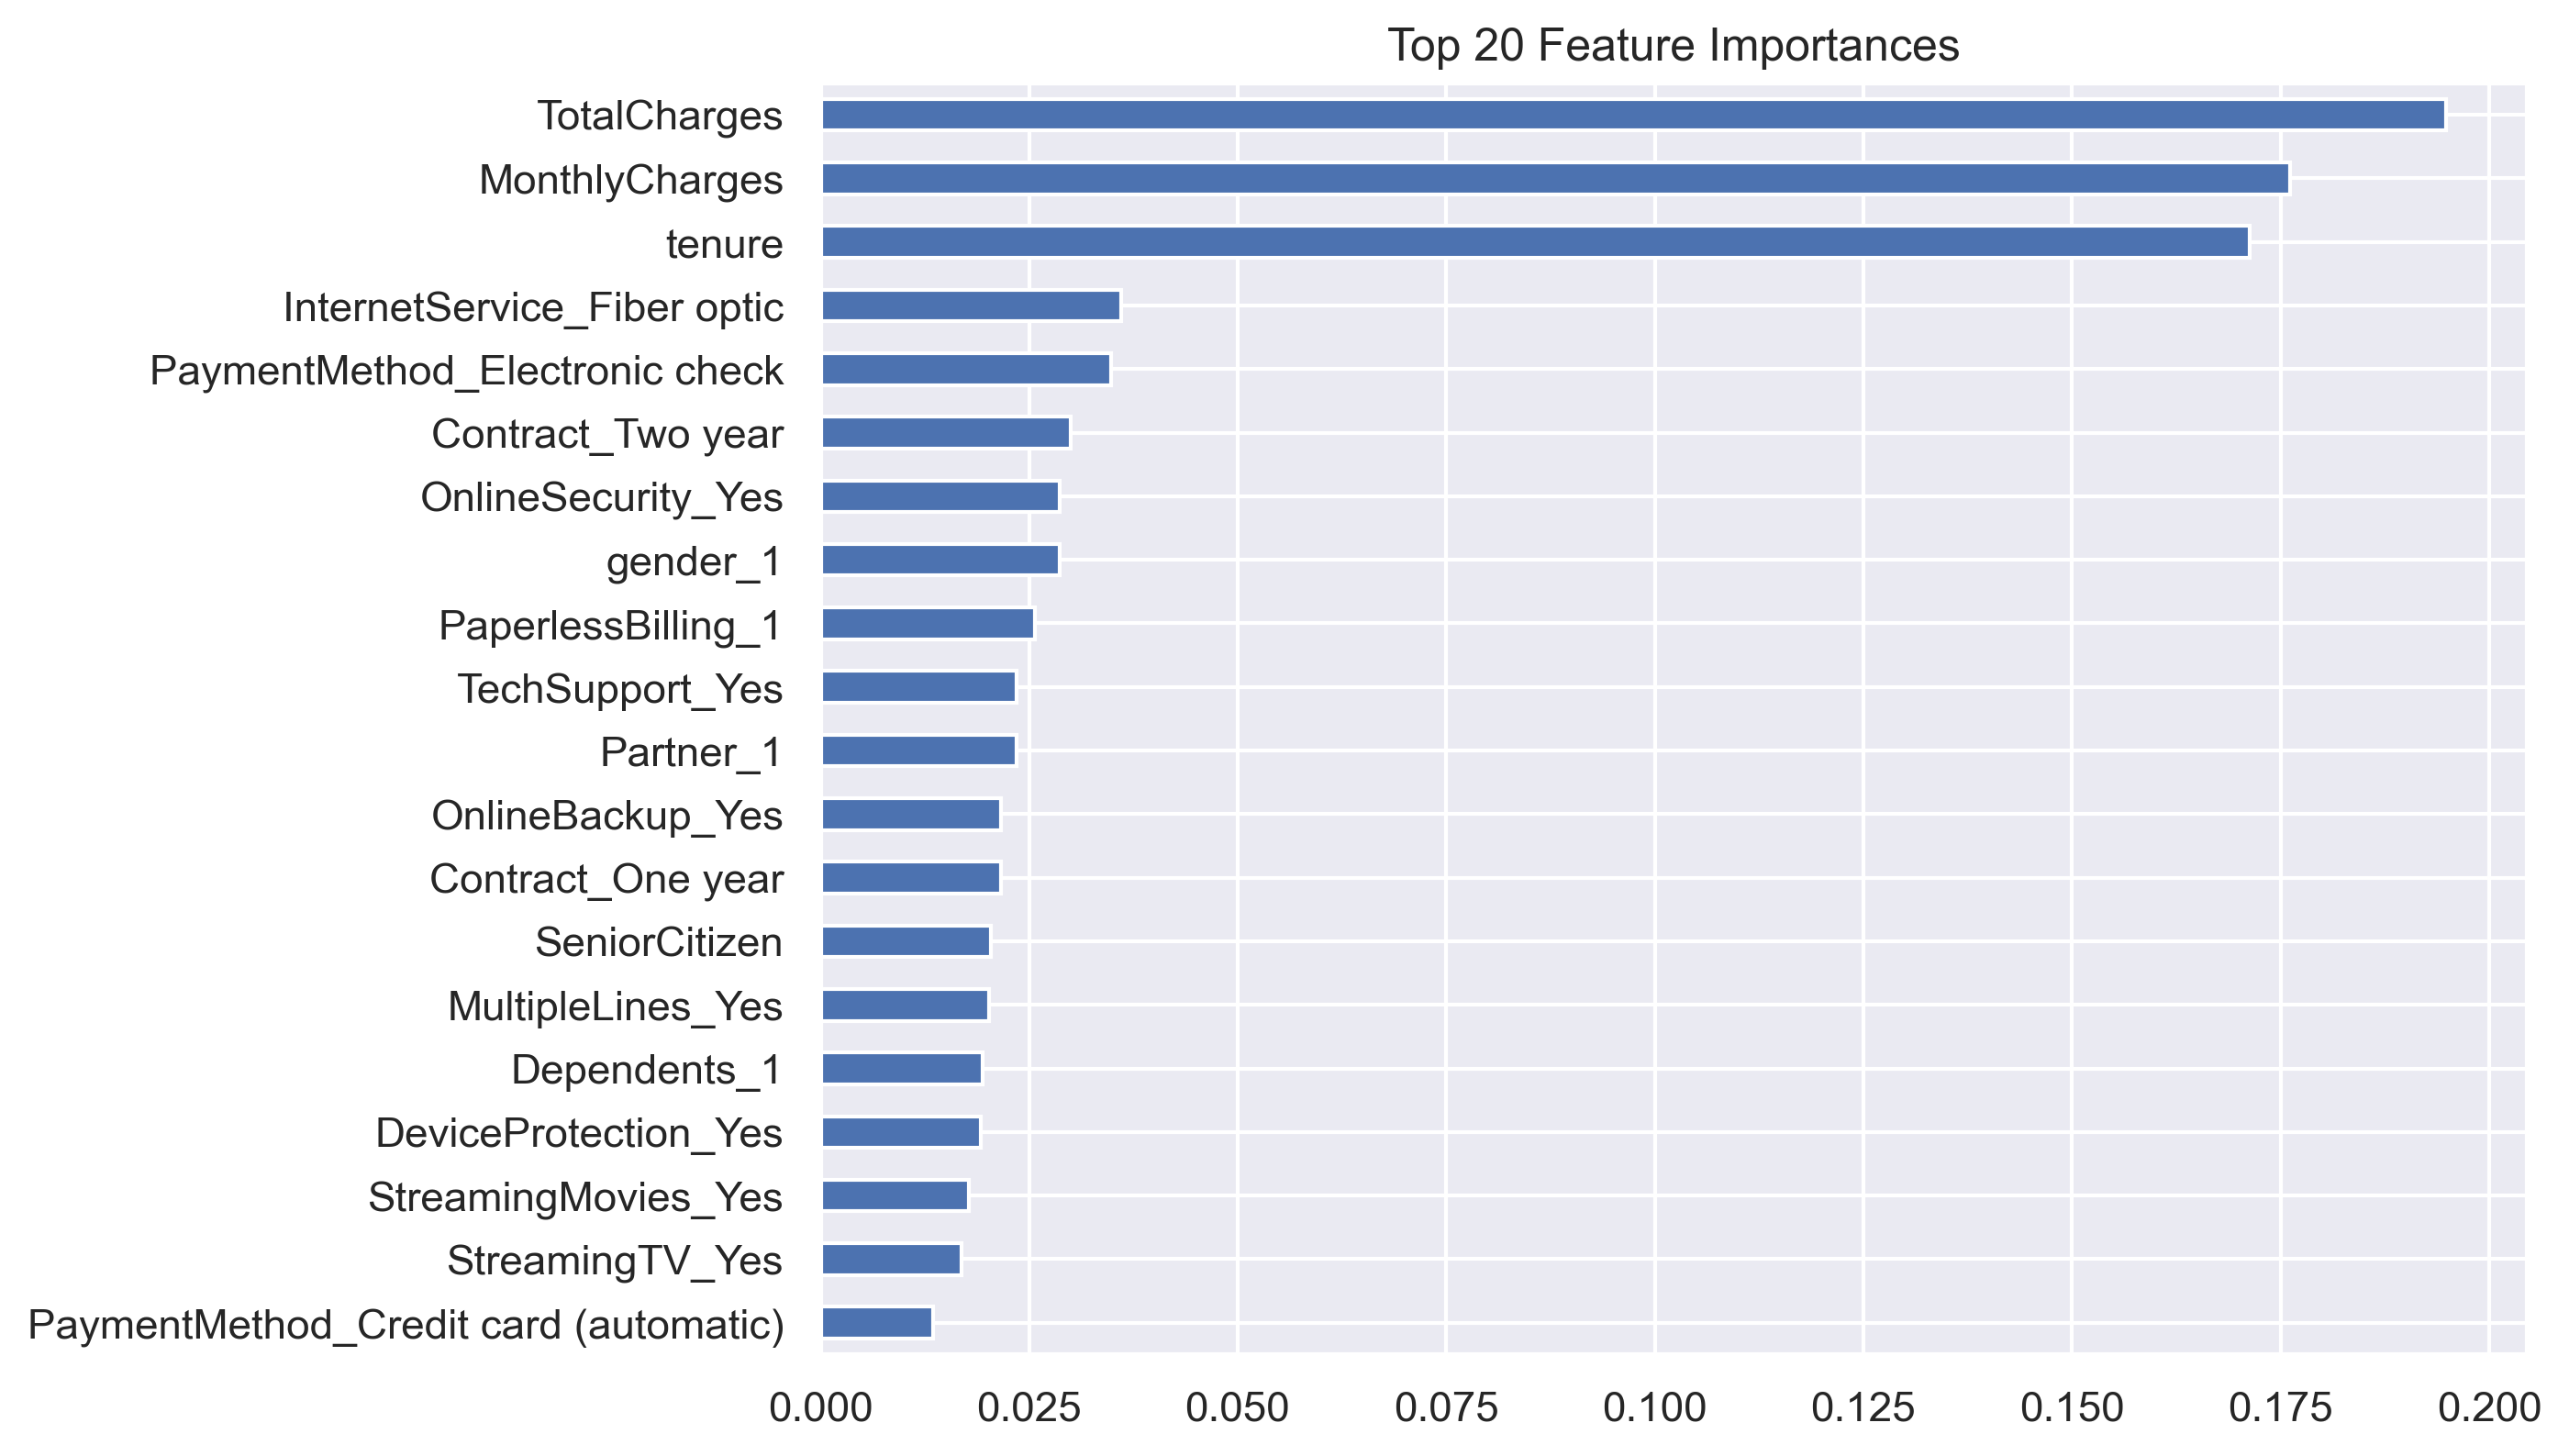

In [30]:
# visualizing features with importances
importances.sort_values(ascending=True).tail(20).plot(kind='barh', figsize=(8,6))
plt.title("Top 20 Feature Importances")
plt.show()

### Model Building

In [44]:
# splitting our data in train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.2, random_state = 42)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report

In [33]:
# this is a function we used for plotting confusion matrix
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    plt.figure(figsize=(10,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{title}\nAccuracy = {acc:.2f}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [34]:
# this is a function we used for plottin roc curve
def plot_roc_curve(y_true, y_proba, title="ROC Curve"):
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    auc_score = roc_auc_score(y_true, y_proba)
    
    plt.figure(figsize=(10,5))
    plt.plot(fpr, tpr, color="blue", label=f"AUC = {auc_score:.3f}")
    plt.plot([0,1], [0,1], color="red", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend()
    plt.show()

In [35]:
# classification metrics 
def print_classification_metrics(y_true, y_pred):
    report = classification_report(y_true, y_pred)
    print(report)

In [36]:
# this is a main evalation function we used
def evaluate_model(model, X_test, y_test, model_name="Model"):
    # Predictions
    y_pred = model.predict(X_test)
    
    # For ROC curve, we need probability of positive class
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:,1]
    else:  # For models like KNeighborsClassifier with no predict_proba in some cases
        y_proba = model.predict(X_test)
    
    print(f"===== {model_name} Evaluation =====")
    print_classification_metrics(y_test, y_pred)
    plot_confusion_matrix(y_test, y_pred, title=f"{model_name} Confusion Matrix")
    plot_roc_curve(y_test, y_proba, title=f"{model_name} ROC Curve")
    print("\n")

===== Random Forest Evaluation =====
              precision    recall  f1-score   support

           0       0.92      0.73      0.82      1053
           1       0.50      0.82      0.62       352

    accuracy                           0.75      1405
   macro avg       0.71      0.77      0.72      1405
weighted avg       0.82      0.75      0.77      1405



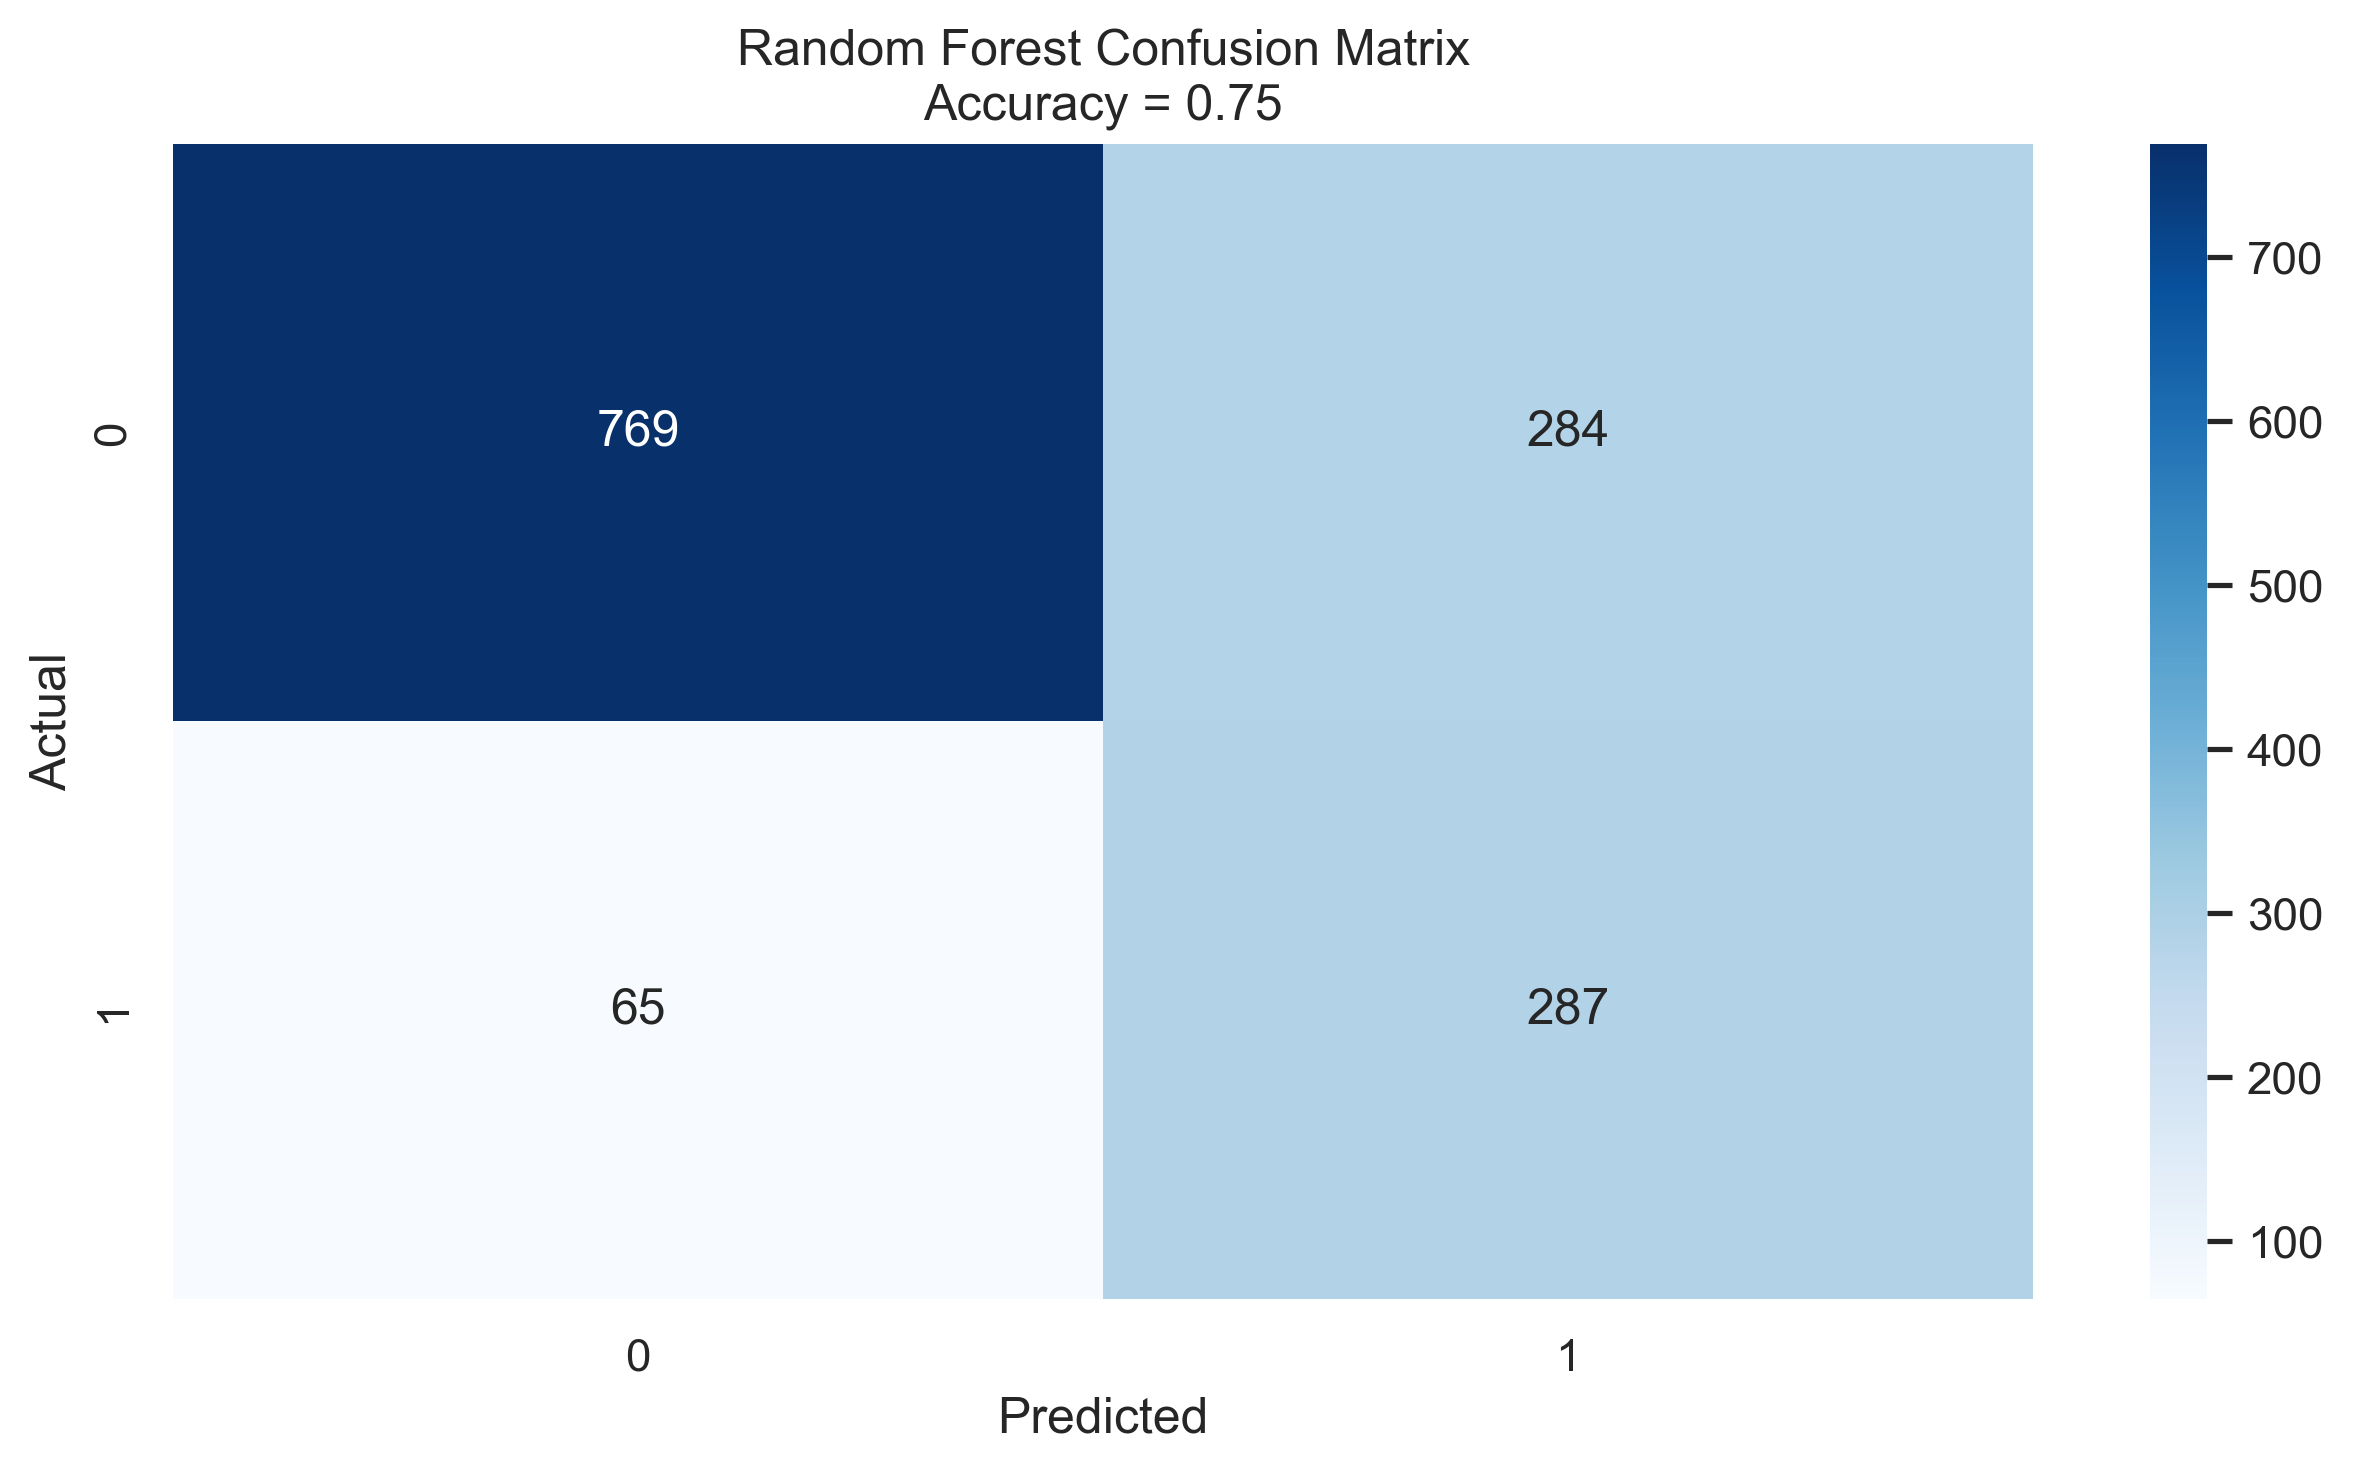

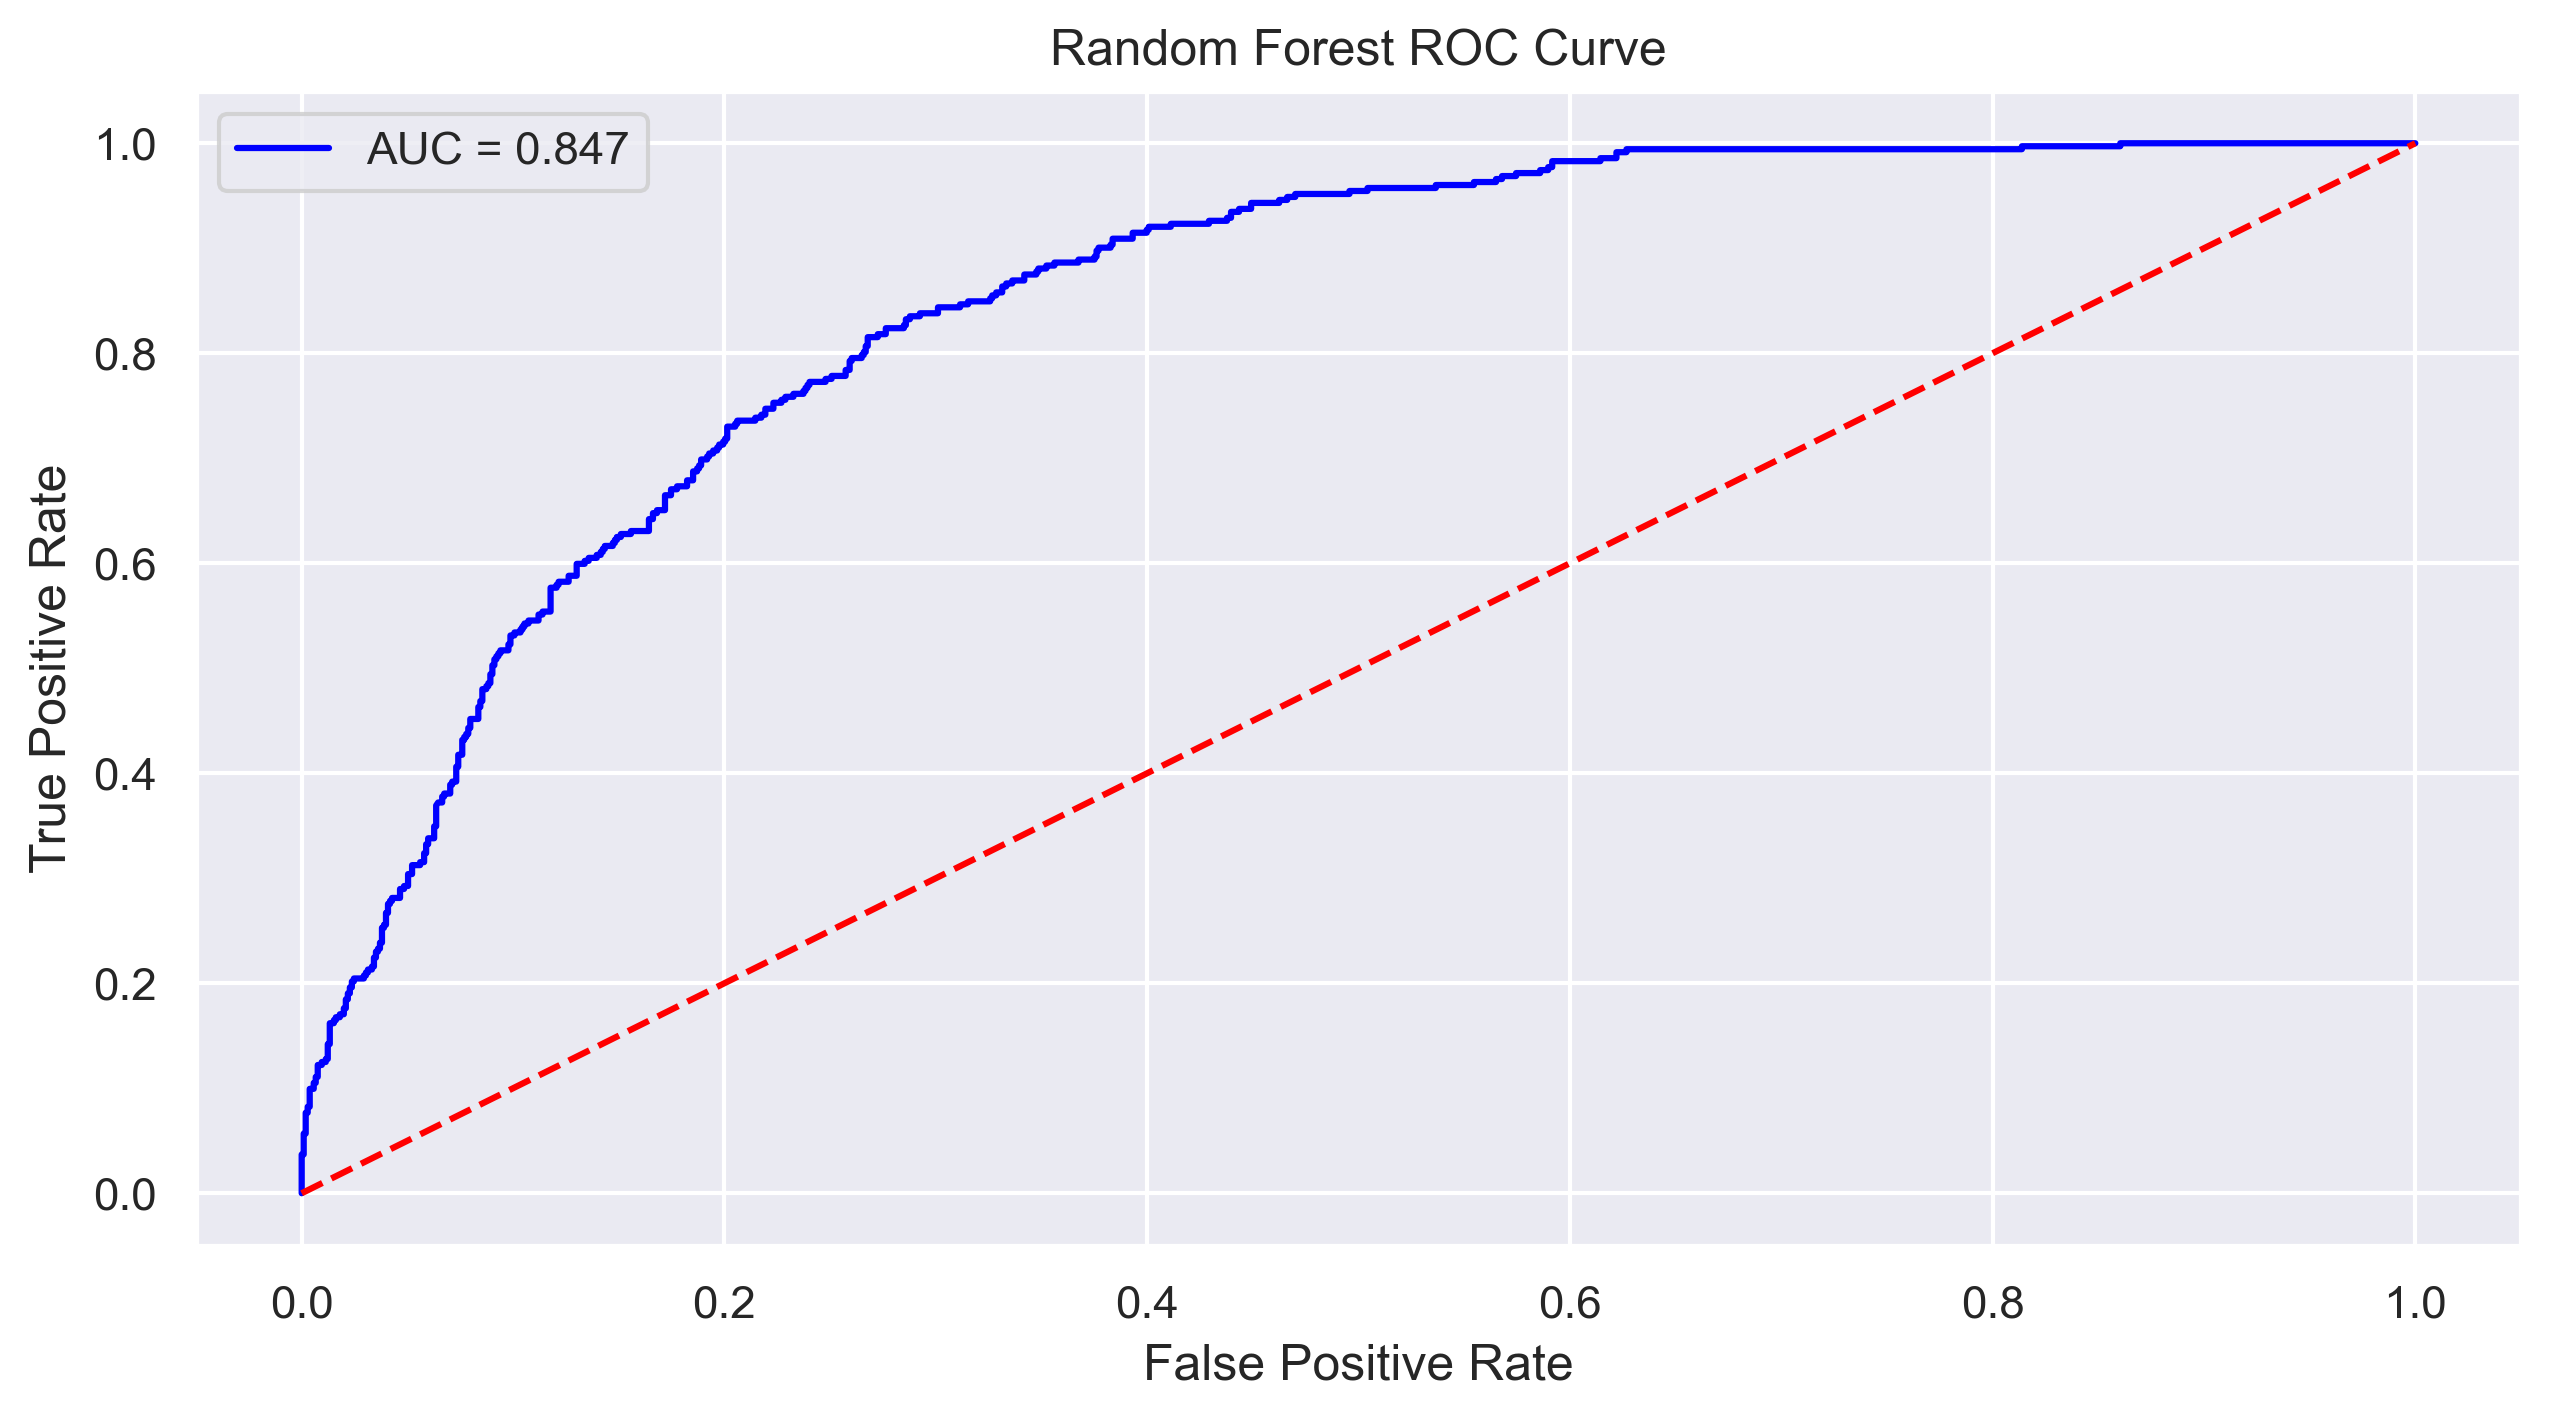

In [37]:
# using random Forest classification with class_weight = balance to handle imbalance data
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,              
    min_samples_split=15,
    min_samples_leaf=5,
    class_weight='balanced',  
    random_state=42
)
rfc_model.fit(x_train,y_train)
evaluate_model(rfc_model, x_test, y_test, model_name="Random Forest")

===== K-Neireast Neighbors Evaluation =====
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1053
           1       0.55      0.47      0.50       352

    accuracy                           0.77      1405
   macro avg       0.69      0.67      0.68      1405
weighted avg       0.76      0.77      0.76      1405



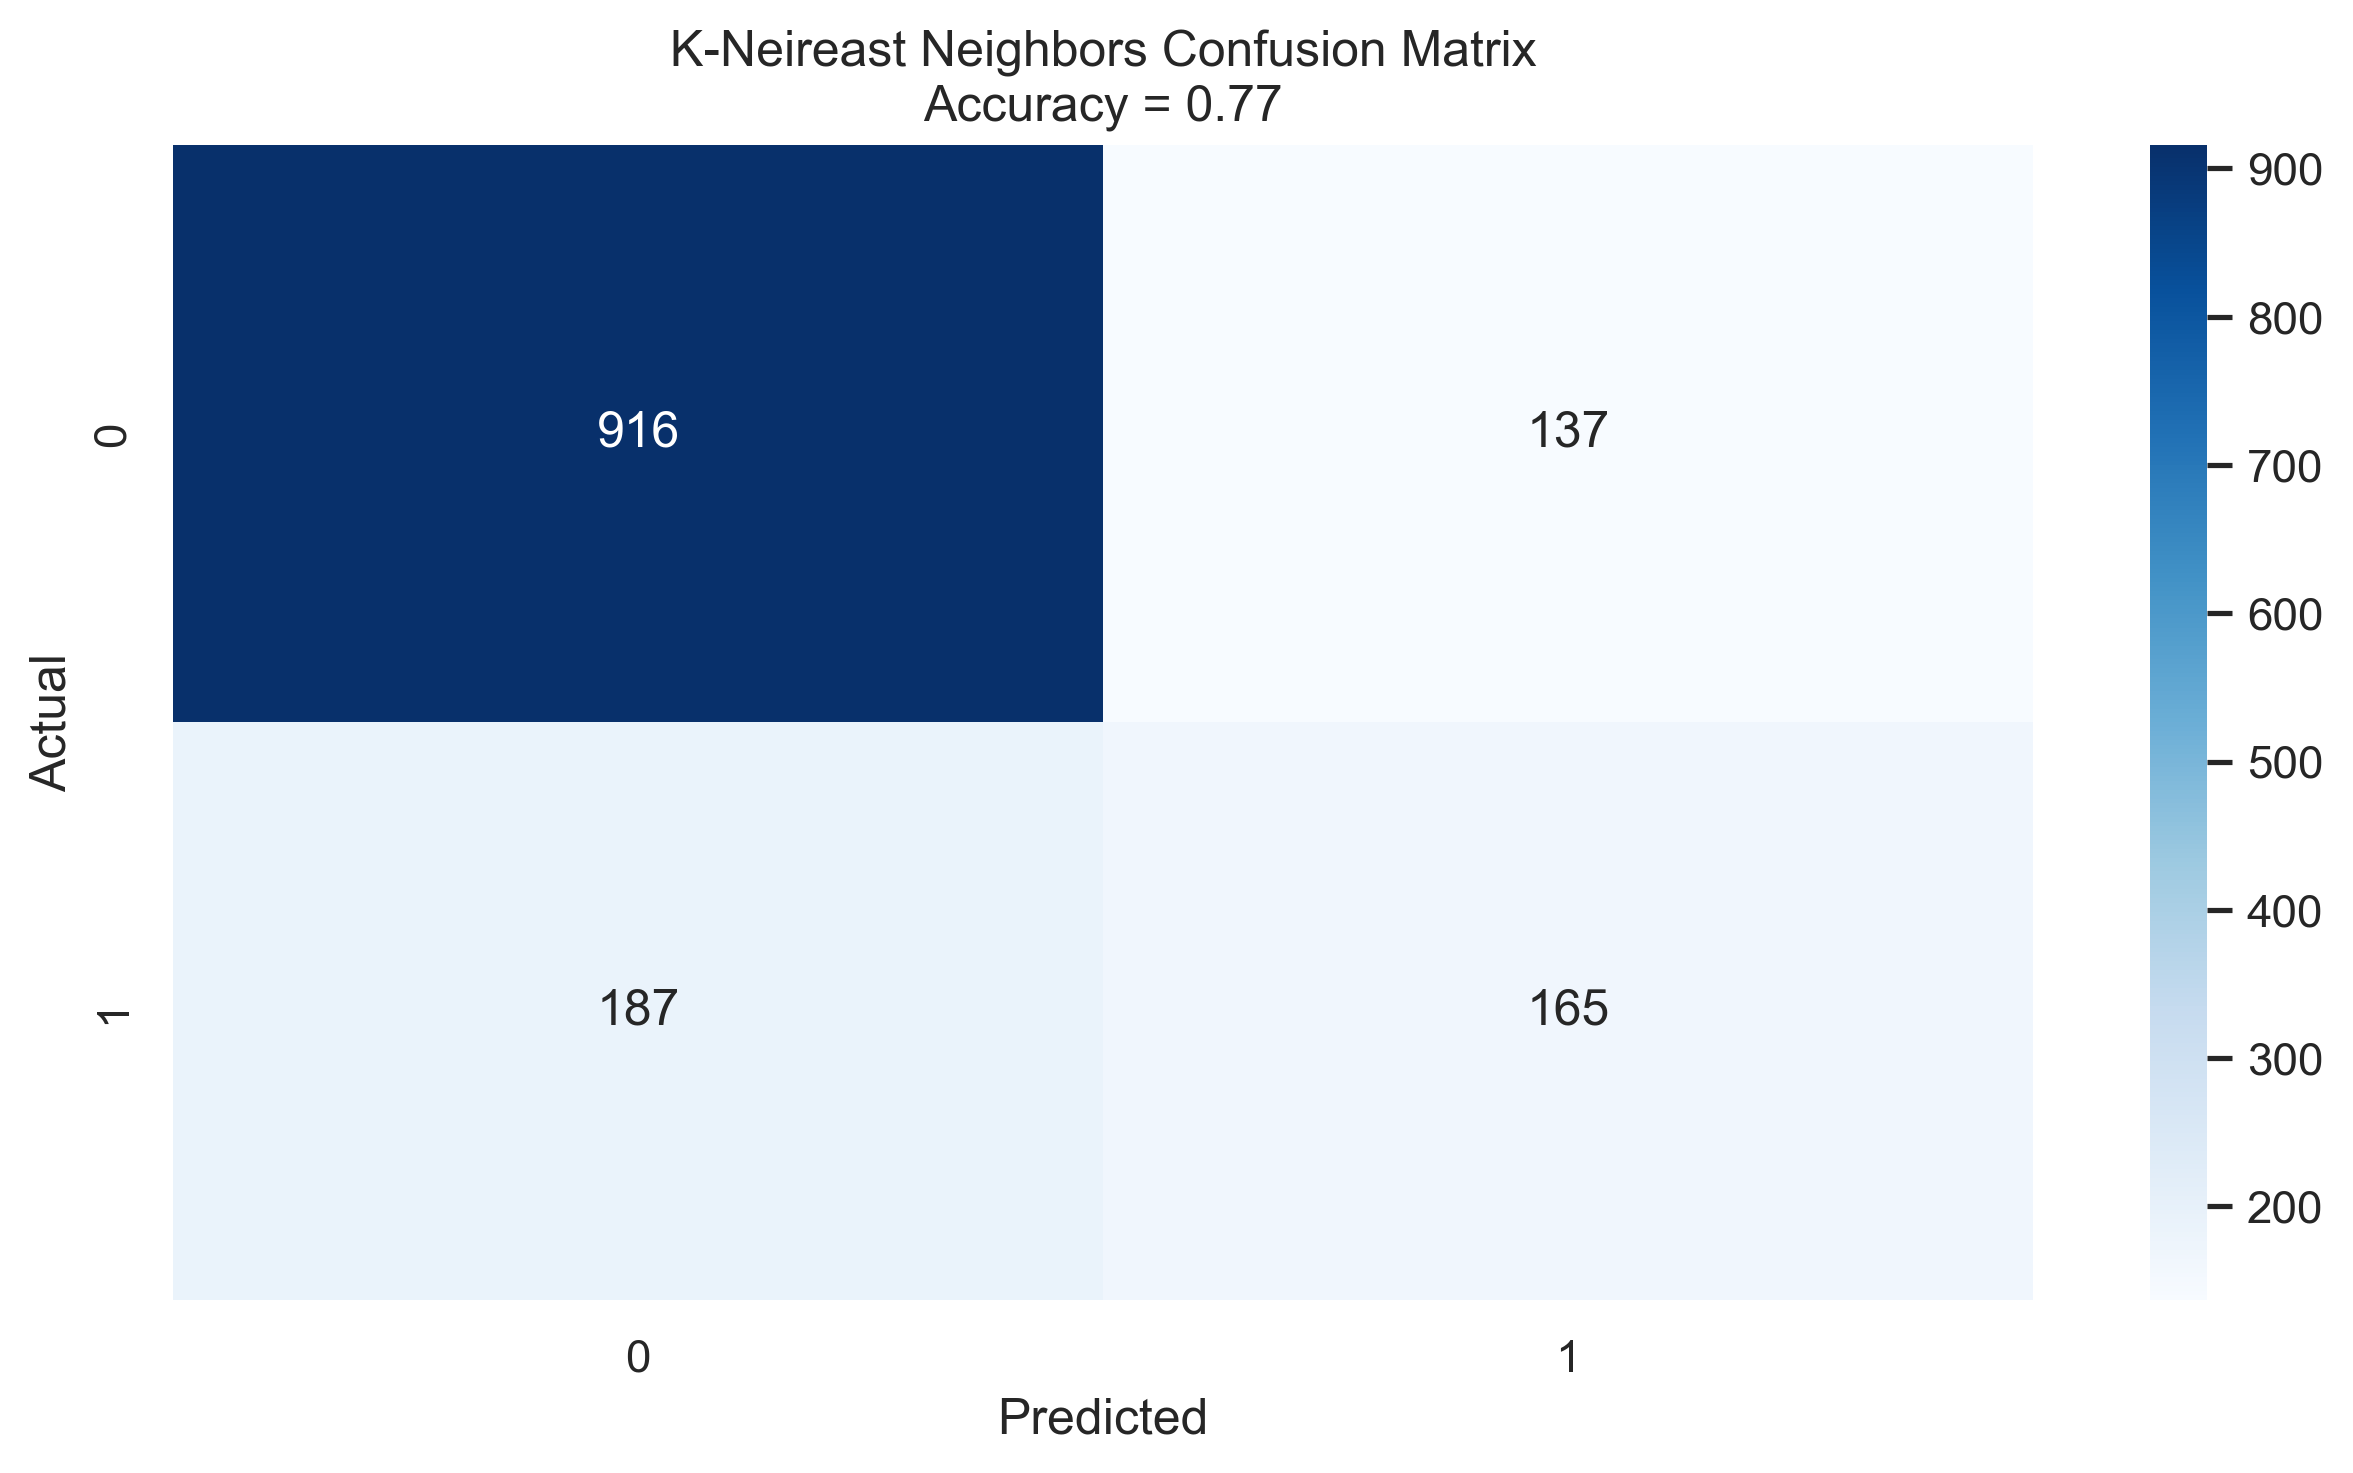

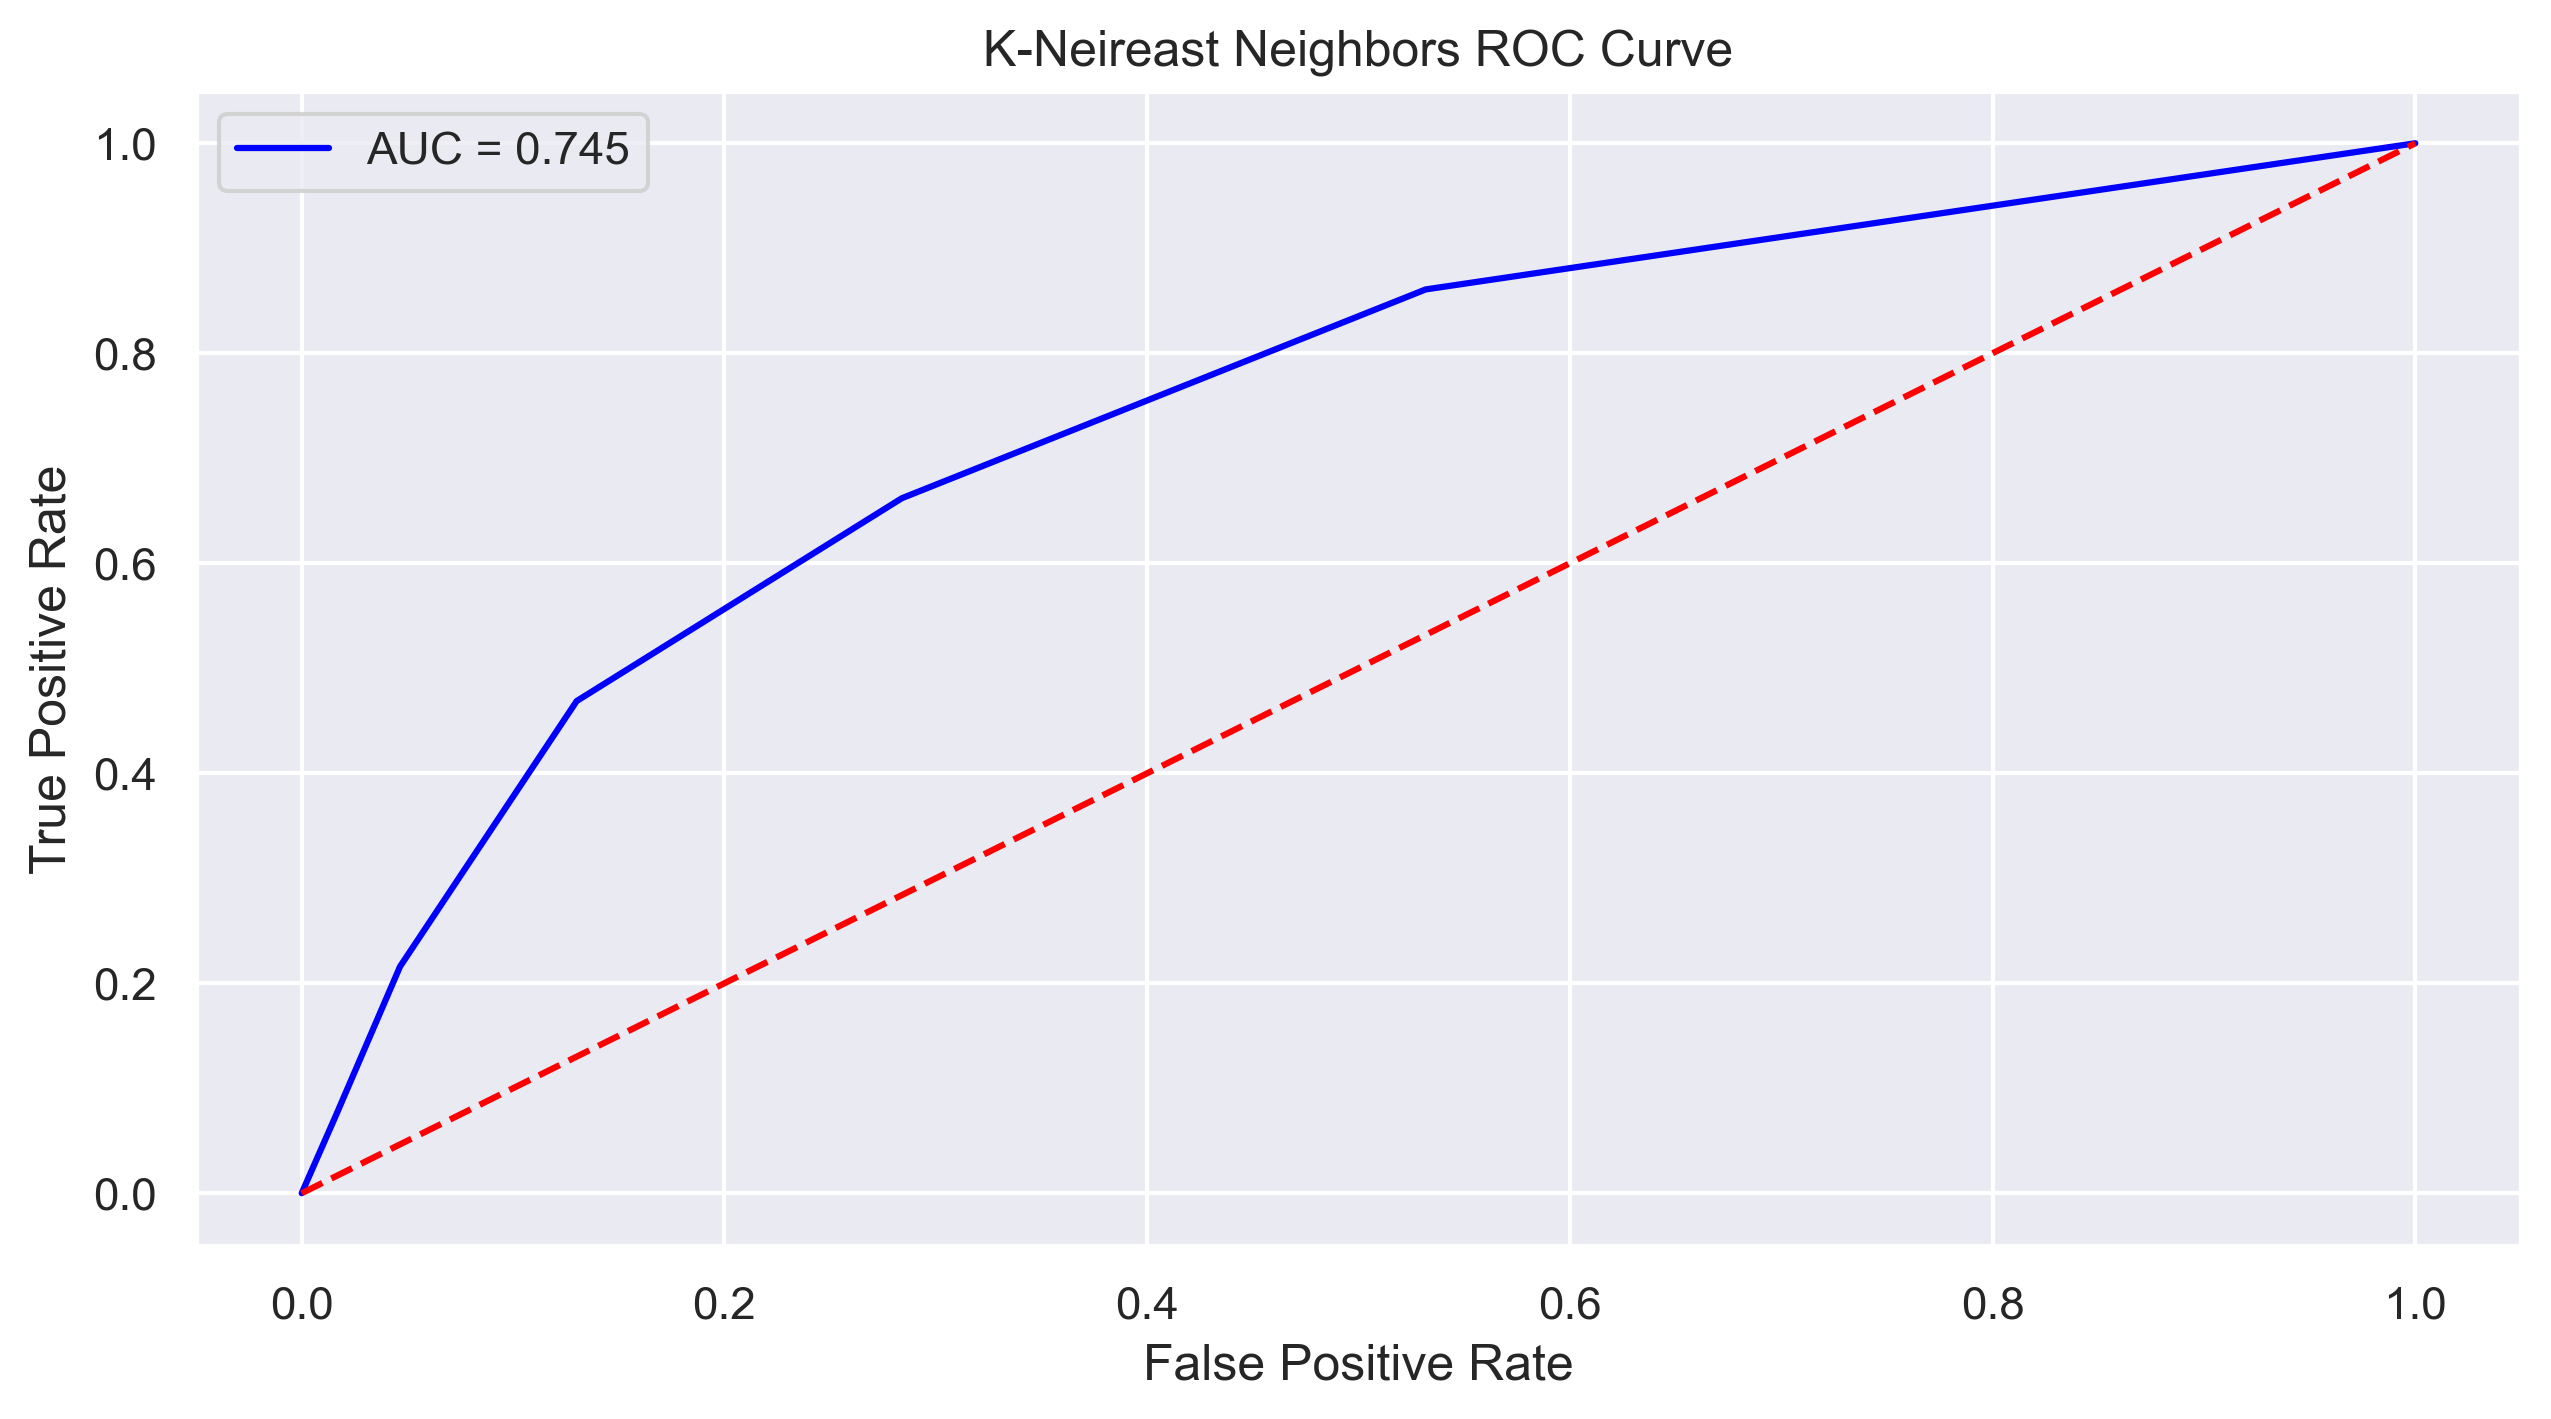

In [38]:
# we will try kneighbors classifier 
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
evaluate_model(knn, x_test, y_test, model_name="K-Neireast Neighbors")

===== Logistic Regression Evaluation =====
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1053
           1       0.61      0.54      0.58       352

    accuracy                           0.80      1405
   macro avg       0.73      0.71      0.72      1405
weighted avg       0.79      0.80      0.80      1405



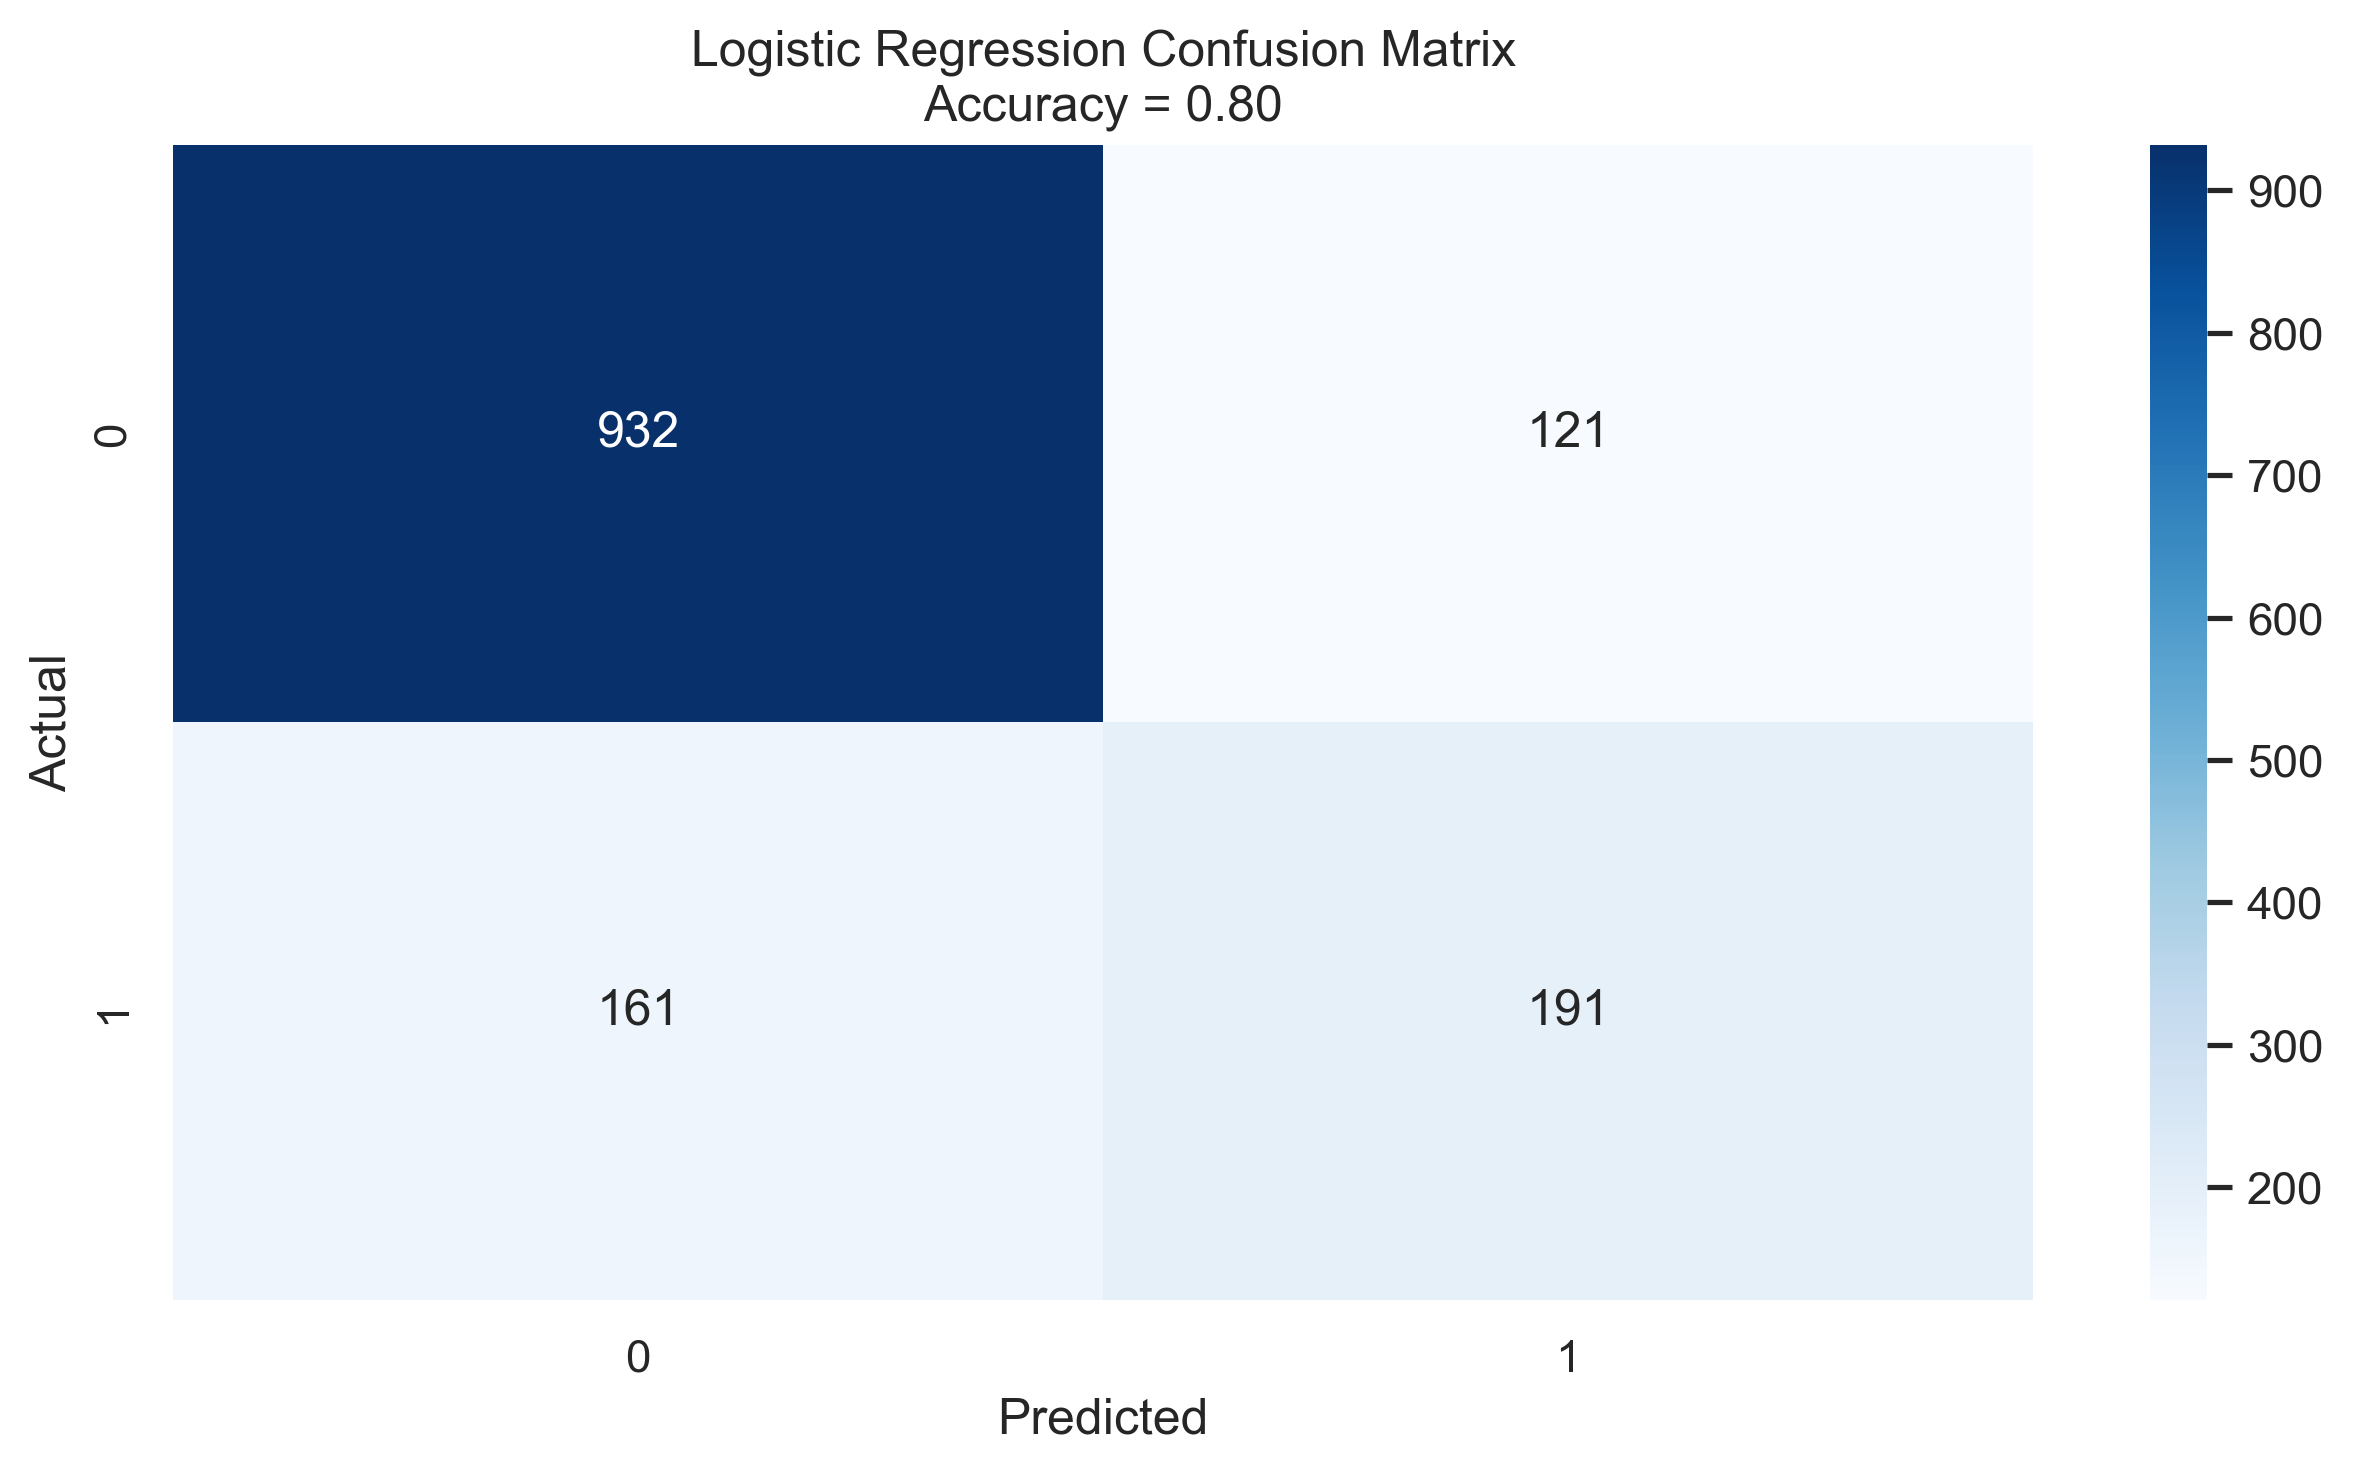

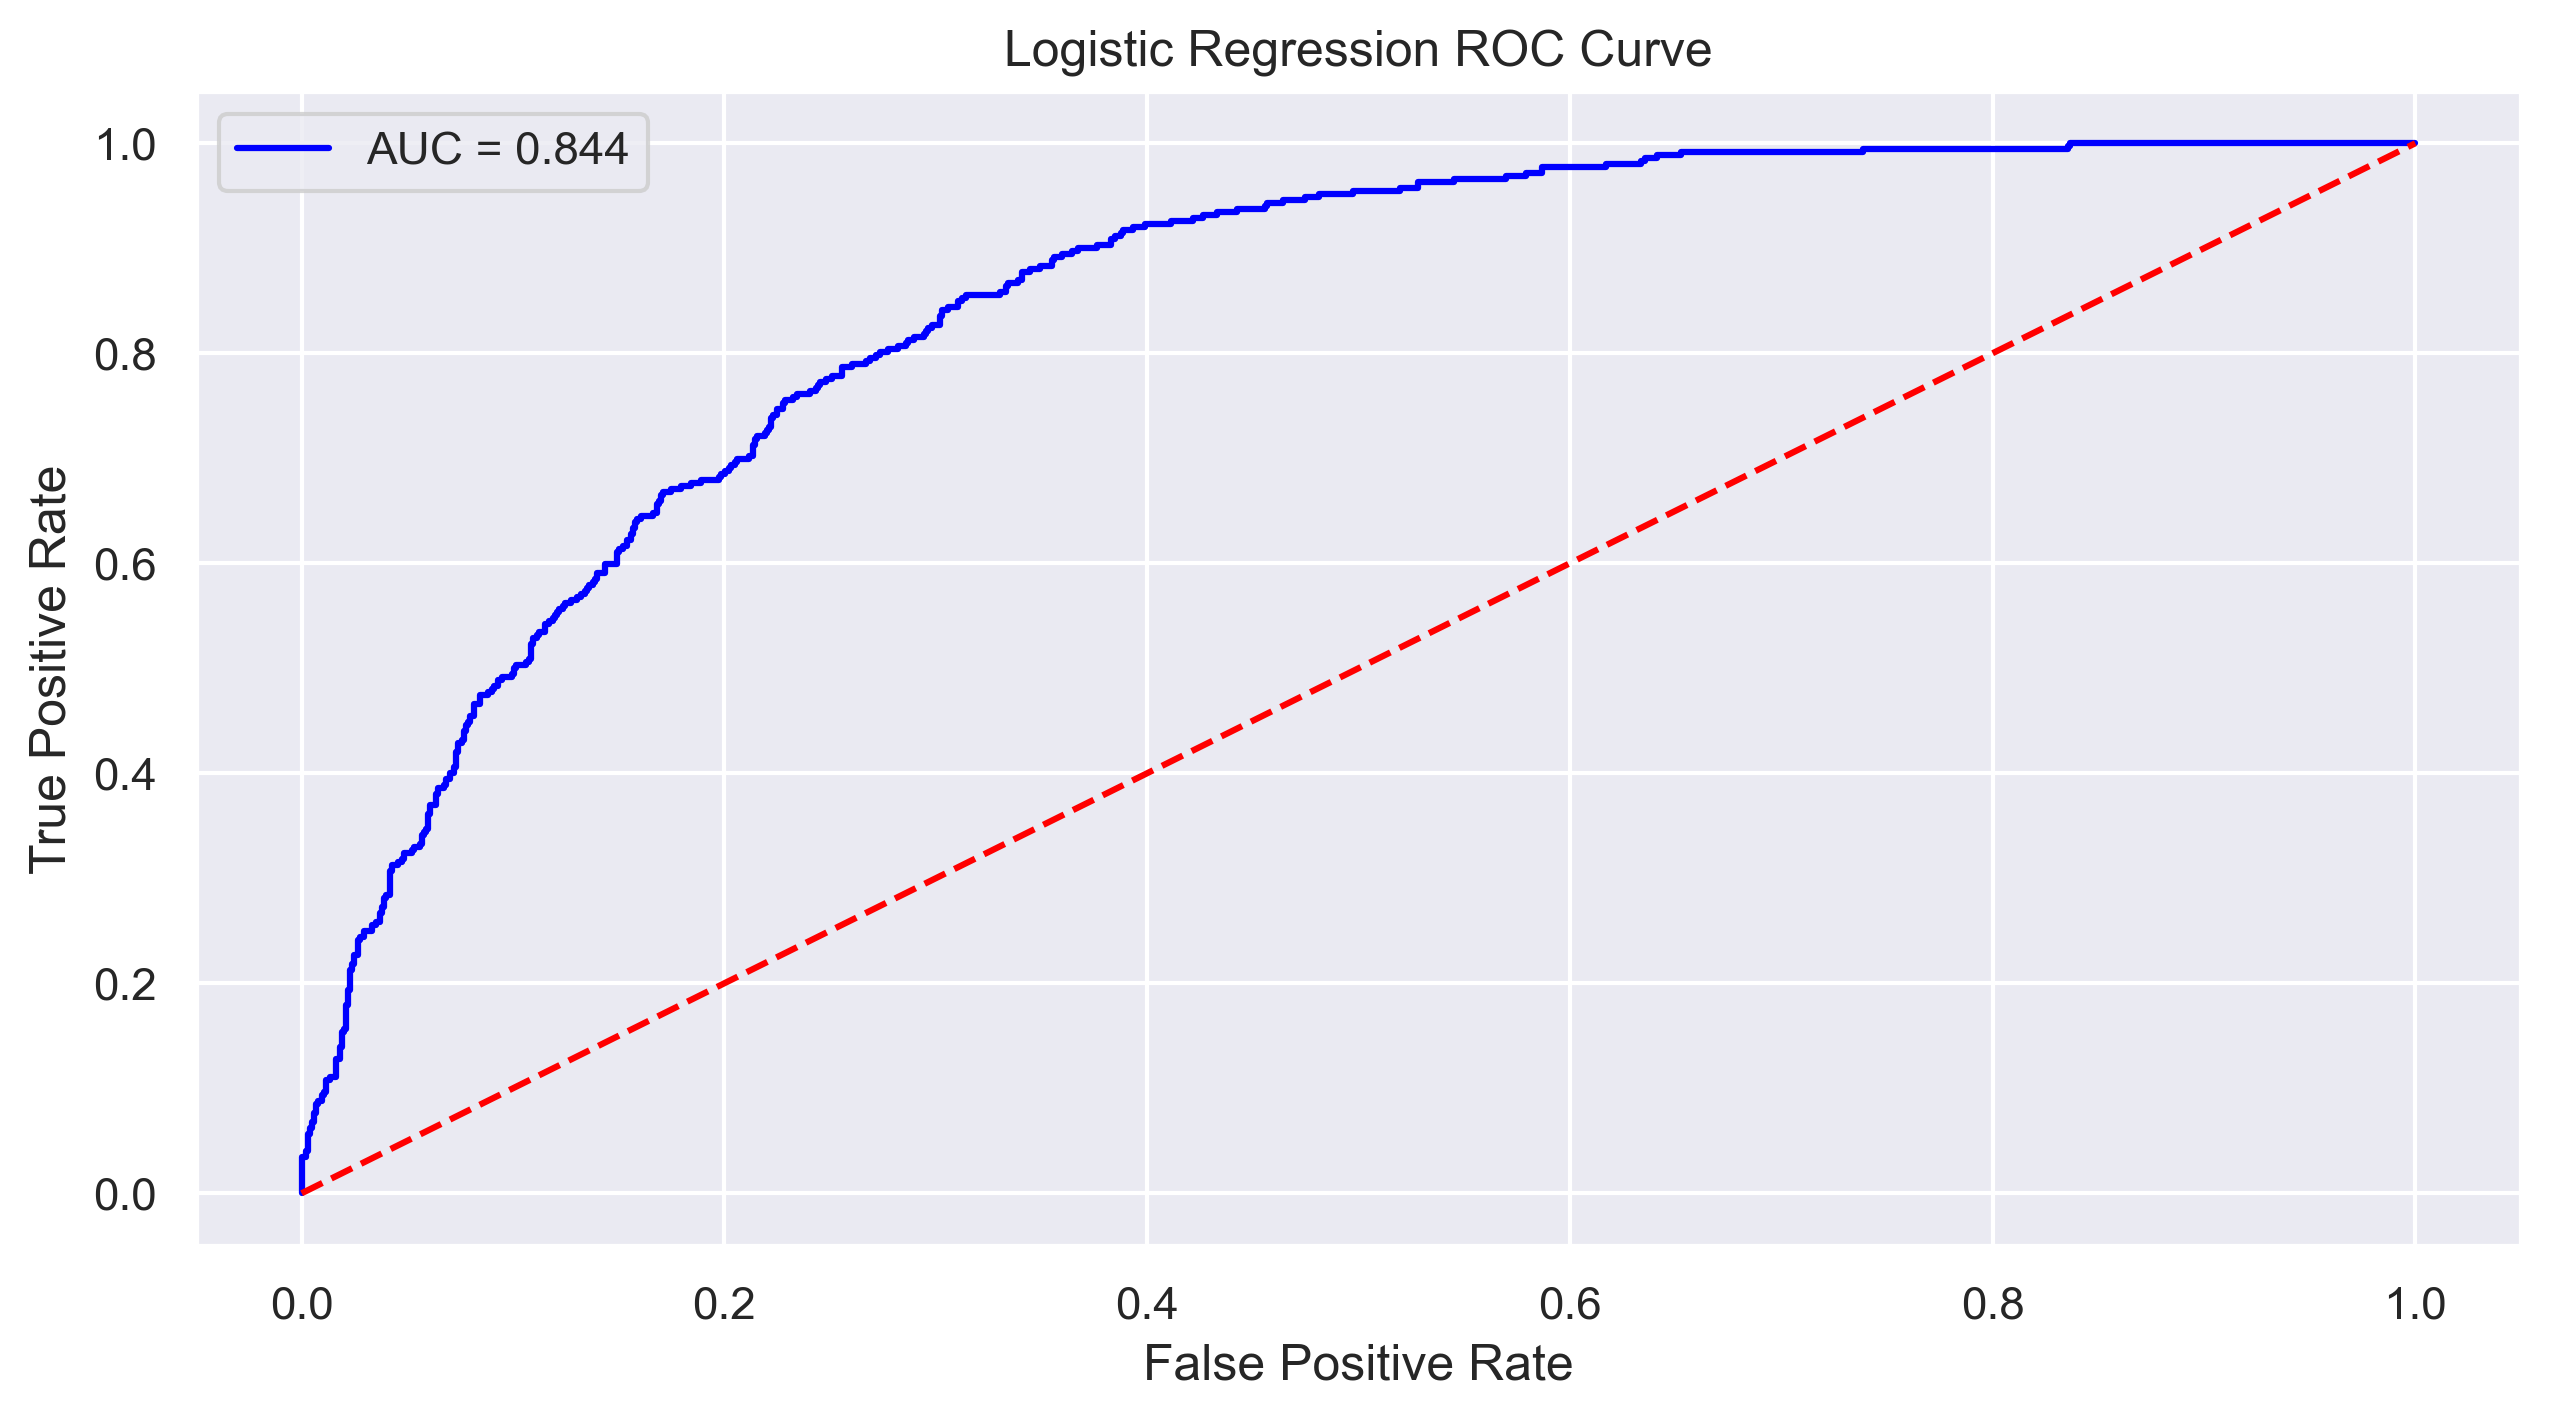

In [39]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(x_train, y_train)
evaluate_model(log_reg, x_test, y_test, model_name="Logistic Regression")

##### Implmenting a Neural Network To Test the Performance also demonstating here that i can comfortably work with neural networks using PyTorch

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset,random_split

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [45]:
type(x_train)

pandas.core.frame.DataFrame

In [46]:
# convert to tensors
x_train = torch.tensor(x_train.values, dtype=torch.float32)
x_test = torch.tensor(x_test.values, dtype=torch.float32)

y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [47]:
# data loader
train_ds = TensorDataset(x_train, y_train)
test_ds = TensorDataset(x_test, y_test)

train_loader = DataLoader(train_ds, batch_size = 64, shuffle=True)
test_loader = DataLoader(test_ds, batch_size = 64)

In [48]:
# defining neural network
class ChurnNN(nn.Module):
    def __init__(self, in_dim):
        super(ChurnNN, self).__init__()
        self.fc1 = nn.Linear(in_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return self.sigmoid(x)

In [49]:
in_dim = x_train.shape[1]
model = ChurnNN(in_dim)

criterion = nn.BCELoss()
optim = optim.Adam(model.parameters(), lr = 0.001)

In [50]:
epochs = 100
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for xb, yb in train_loader:
        optim.zero_grad()
        outputs = model(xb)
        loss = criterion(outputs, yb)
        loss.backward()
        optim.step()
        running_loss += loss.item()
        
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")   

Epoch [1/100], Loss: 6.5543
Epoch [2/100], Loss: 2.1347
Epoch [3/100], Loss: 1.1655
Epoch [4/100], Loss: 0.8122
Epoch [5/100], Loss: 0.6985
Epoch [6/100], Loss: 0.6557
Epoch [7/100], Loss: 0.5796
Epoch [8/100], Loss: 0.5609
Epoch [9/100], Loss: 0.5641
Epoch [10/100], Loss: 0.5422
Epoch [11/100], Loss: 0.5121
Epoch [12/100], Loss: 0.5308
Epoch [13/100], Loss: 0.4883
Epoch [14/100], Loss: 0.4823
Epoch [15/100], Loss: 0.4819
Epoch [16/100], Loss: 0.4854
Epoch [17/100], Loss: 0.4672
Epoch [18/100], Loss: 0.4719
Epoch [19/100], Loss: 0.4644
Epoch [20/100], Loss: 0.4577
Epoch [21/100], Loss: 0.4582
Epoch [22/100], Loss: 0.4679
Epoch [23/100], Loss: 0.4586
Epoch [24/100], Loss: 0.4564
Epoch [25/100], Loss: 0.4516
Epoch [26/100], Loss: 0.4527
Epoch [27/100], Loss: 0.4481
Epoch [28/100], Loss: 0.4520
Epoch [29/100], Loss: 0.4531
Epoch [30/100], Loss: 0.4536
Epoch [31/100], Loss: 0.4464
Epoch [32/100], Loss: 0.4469
Epoch [33/100], Loss: 0.4509
Epoch [34/100], Loss: 0.4452
Epoch [35/100], Loss: 0

In [51]:
model.eval()
with torch.no_grad():
    y_pred = model(x_test)
    y_pred_class = (y_pred >= 0.5).int()

print(classification_report(y_test, y_pred_class))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87      1053
         1.0       0.66      0.32      0.44       352

    accuracy                           0.79      1405
   macro avg       0.73      0.63      0.65      1405
weighted avg       0.77      0.79      0.76      1405

ROC-AUC: 0.8389571462488129


In [ ]:
'''
In this way, we tested and evaluated the performance of Random Forest, K-Nearest Neighbors, and Logistic Regression 
models and also used Neural Networks (PyTorch) on the Telco Customer Churn dataset using accuracy, precision, recall, 
F1-score, confusion matrix, and ROC-AUC metrics.
'''

# Unsupervised Learning

#### Performing Clustering

In [52]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [53]:
# we will drop Churn column as we are performing unsupervised learning
x_cluster = df.drop('Churn', axis = 1).values

In [54]:
inertia = []
K = range(2,11)

for i in K:
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(x_cluster)
    inertia.append(kmeans.inertia_)

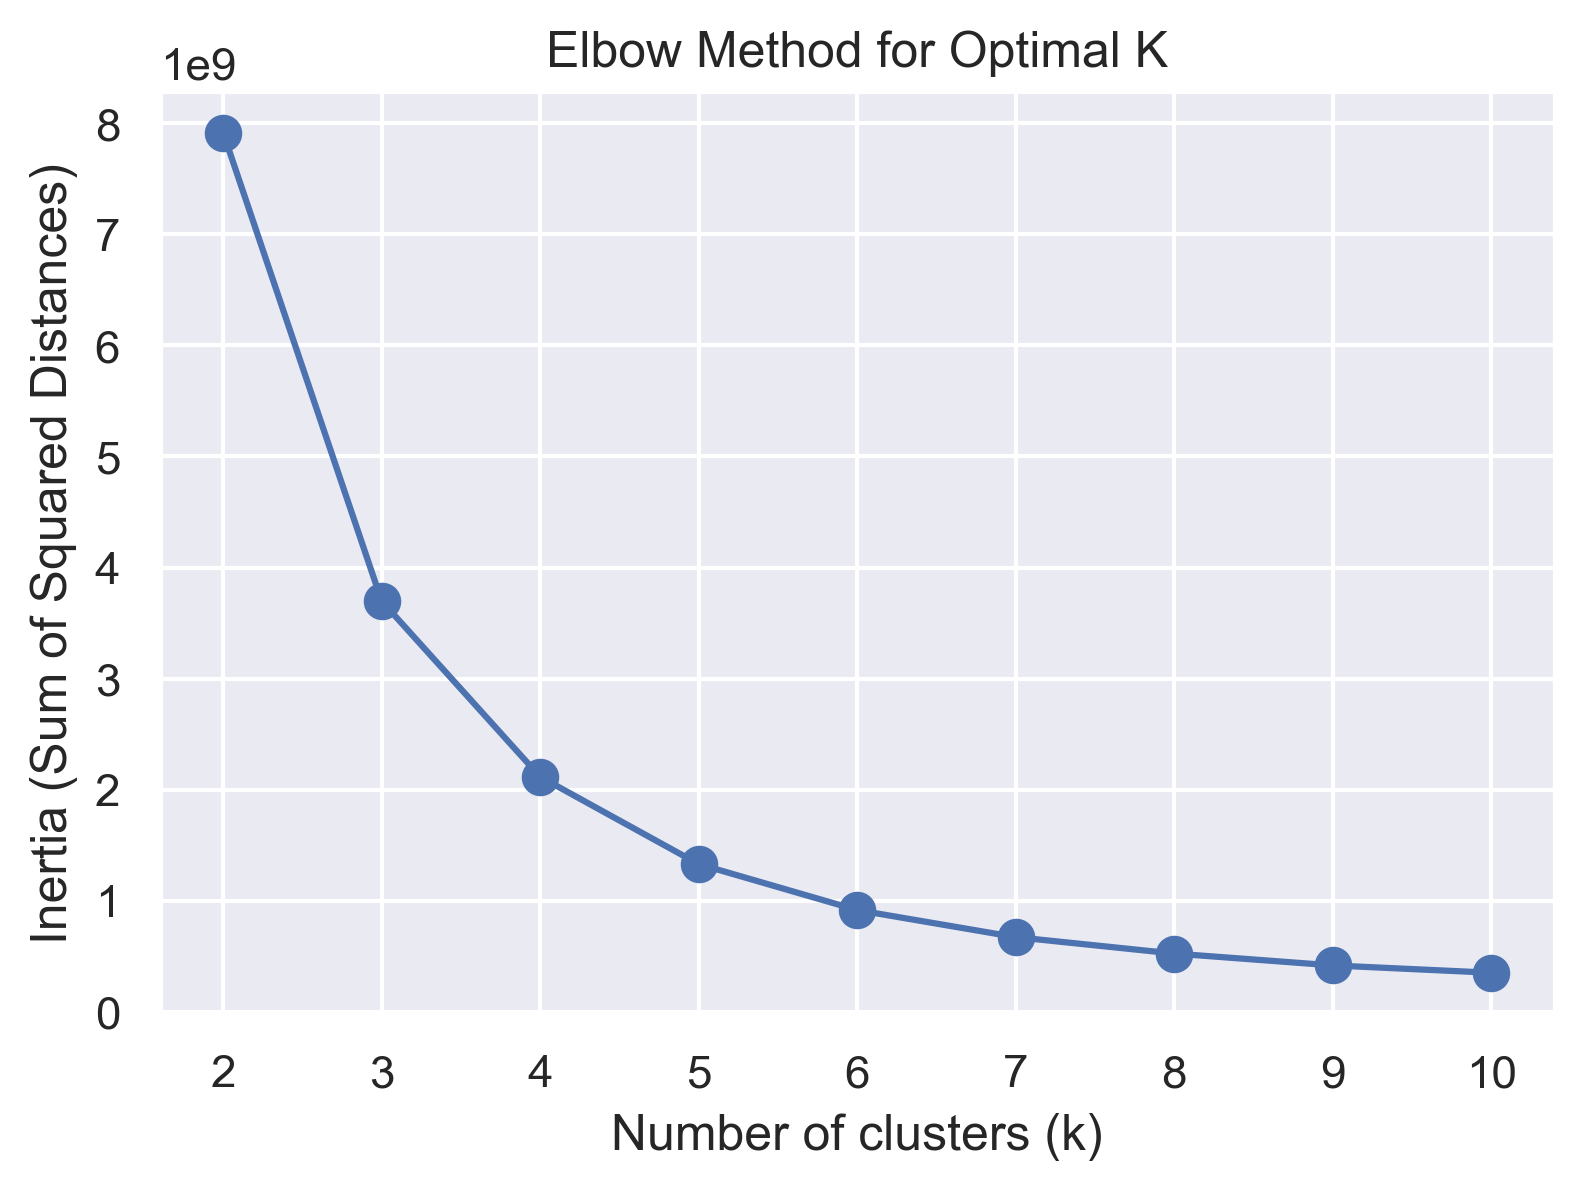

In [55]:
plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal K")
plt.show()

In [56]:
# silhouette score for cluster quality
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(x_cluster)
    score = silhouette_score(x_cluster, labels)
    print(f"K = {k}, Silhouette Score = {score:.3f}")

K = 2, Silhouette Score = 0.703
K = 3, Silhouette Score = 0.644
K = 4, Silhouette Score = 0.602
K = 5, Silhouette Score = 0.595
K = 6, Silhouette Score = 0.594


In [57]:
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(x_cluster)

# Adding cluster labels to dataframe
df['Cluster'] = clusters

In [58]:
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_1,Partner_1,Dependents_1,PhoneService_1,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_1,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn,Cluster
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,0,1,...,0,1,1,0,1,0,0,1,0,2
7039,0,72,103.20,7362.90,0,1,1,1,0,1,...,0,1,1,0,1,1,0,0,0,1
7040,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0
7041,1,4,74.40,306.60,1,1,0,1,0,1,...,0,0,0,0,1,0,0,1,1,0


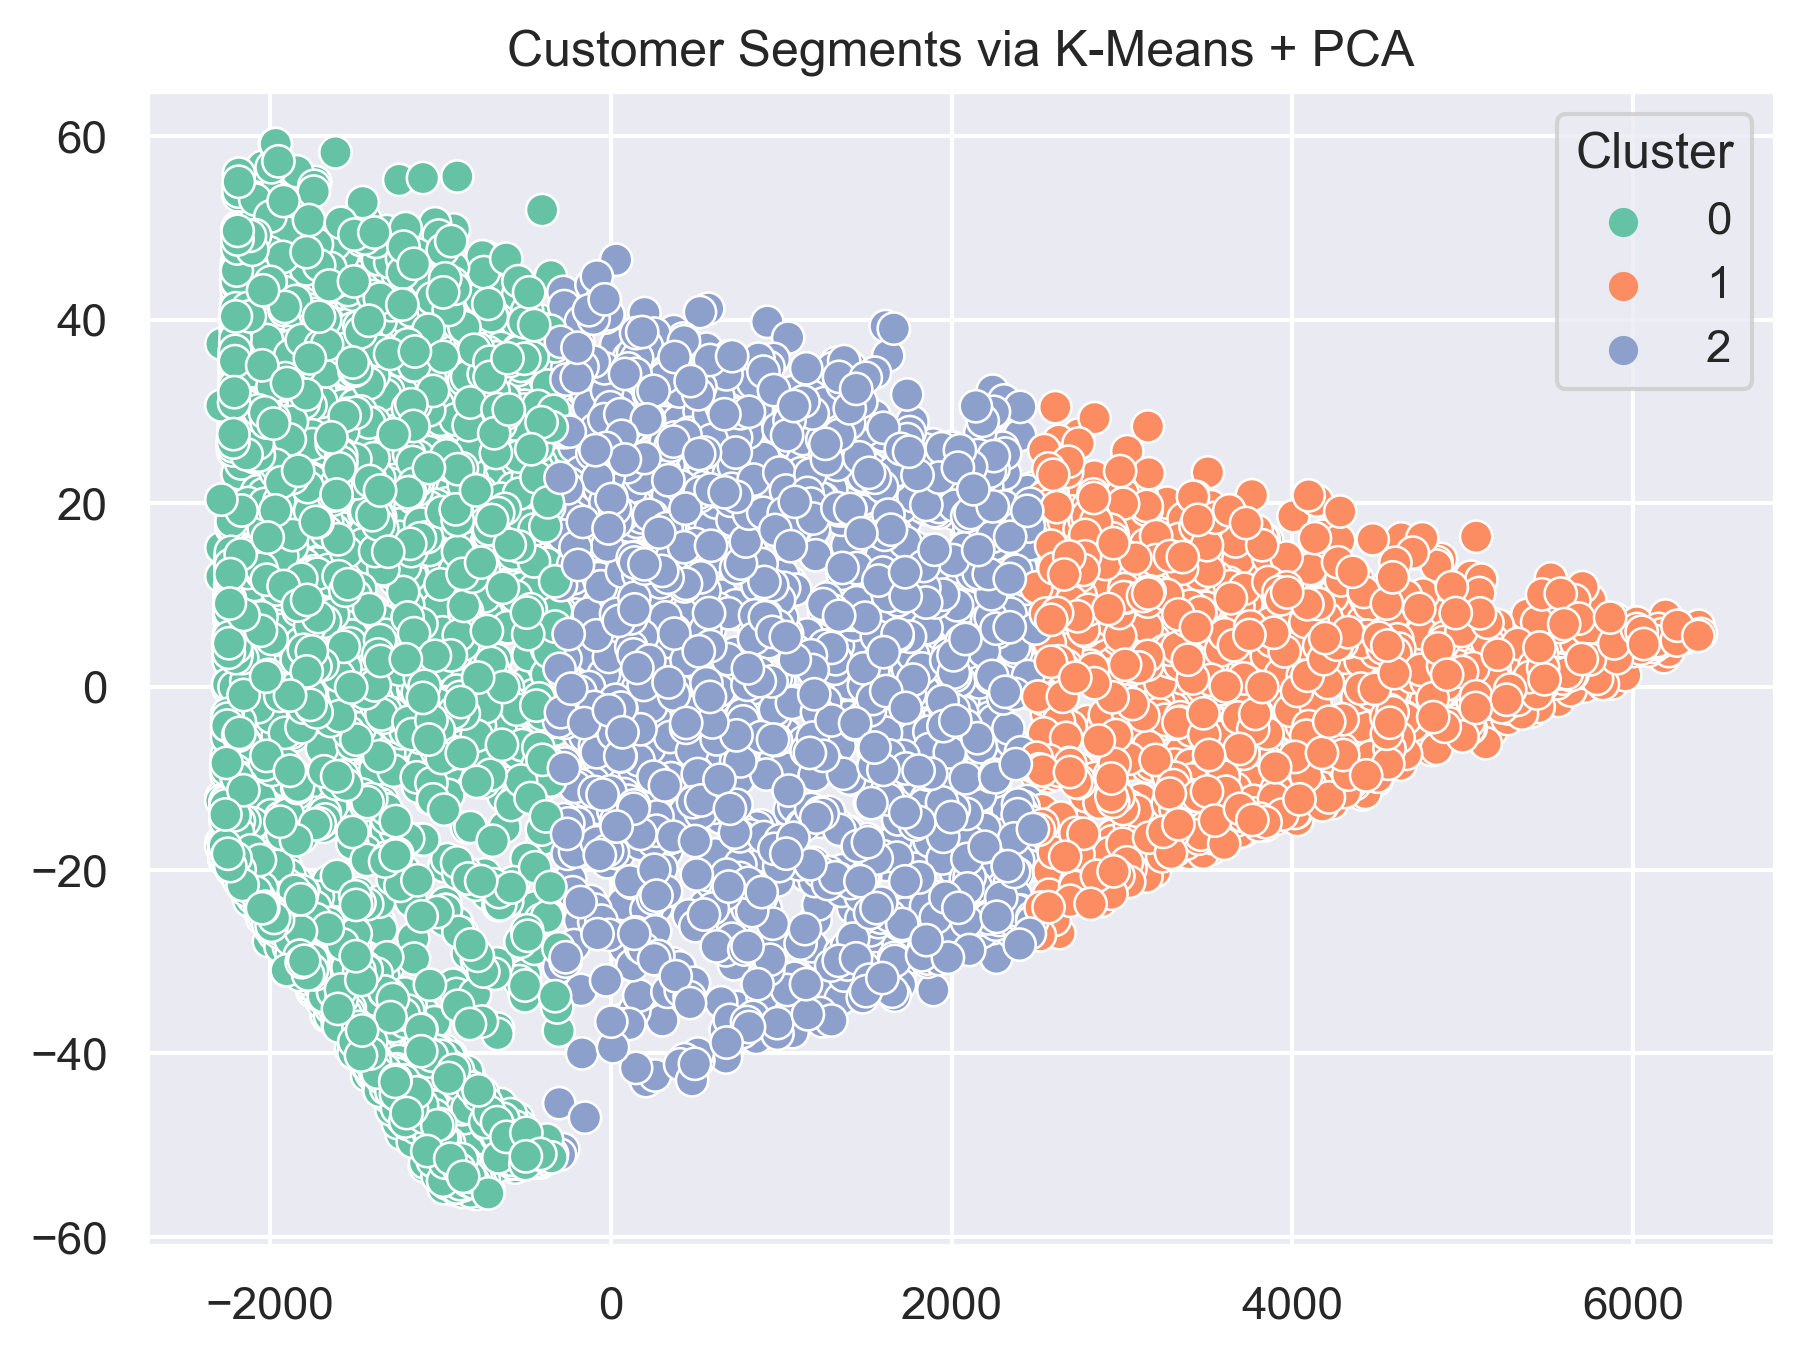

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_cluster)

plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette="Set2", s=60)
plt.title("Customer Segments via K-Means + PCA")
plt.show()

In [ ]:
'''
We applied K-Means clustering on the Telco Customer Churn dataset to identify distinct customer segments. 
Using the elbow method and silhouette scores, we determined the optimal number of clusters and visualized them using PCA. 
This unsupervised analysis helps uncover hidden patterns in customer behavior and can provide insights into churn 
tendencies across different segments.
'''

In [60]:
final_data = df.copy()
final_data.to_csv("churn_final.csv", index=False)
print("✅ churn_final.csv exported successfully!")

✅ churn_final.csv exported successfully!


In [73]:
import joblib
joblib.dump(rfc_model, "churn_model.pkl")

['churn_model.pkl']